# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

### Initialization

We begin with loading libraries required for the project. 

In [508]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


### Load data

Let's load the project data and have a look at the general information.

In [735]:
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')

# Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [511]:
# print the general information about the DataFrame
data.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [512]:
# print a sample of data
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Our data contains 13 columns of 51525 rows, they have numerical and categotical values describing used vehicles.
Only 8 of them do not have missing values, while 5 columns have NaNs and need  further investigation.


Not all data types are ok:

Values in 'model _year', 'cylinders', 'is_4wd' are float but should be integer. Data in 'date_posted' column are object type, they need to be converting to datetime type. Values in 'model' column are inconsistent and need to be edited.


Check missing values:

In [513]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

5 columns have missing values: 'is_4wd' has maximum number of missing values(about 50% of data), then 'paint_color',
'odometer', 'cylinders', 'model_year'. Some of missing values can be restored, some can not.
Minimum values in columns 'price' and 'odometer' (1.0 and 0.0 ) are susceptible, they can be errors or missing values too.

Let's check if there're any duplicates in data:

In [514]:
data.duplicated().sum()

0

**Conclusions and further steps**


We found some issues with data: missing values, unrealistic values, wrong data types, datetime formatting, inconsistent values.  These issues shoud be addressed before the required analysis. Fortunately, there are no duplicates and no special treatment needed.
It would be better to start with editing inconsisted values in 'model' column, which will further help to fix issues with other columns.

## Edit 'model' inconsisted values

There are 100 car models in the dataset.

In [515]:
data.model.unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

Some model names are very similar, they actually represent the same model. It would be better to unite them with one name. We need a dictionary for model names that will be used in a function.

In [516]:
model_dict={'ford f150':'ford f-150', 
            'ford f150 supercrew cab xlt':'ford f-150',
            'ford f250':'ford f-250', 
            'ford f-250 sd':'ford f-250',
            'ford f250 super duty':'ford f-250', 
            'ford f-250 super duty':'ford f-250',
            'ford f350':'ford f-350', 
            'ford f350 super duty':'ford f-350',
            'chevrolet silverado 1500 crew':'chevrolet silverado 1500'}

In [517]:
def replace_model(x):
    if x in model_dict.keys():
        return model_dict[x]
    else:
        return x


In [518]:
# check our function
replace_model('ford f-250 super duty')

'ford f-250'

In [519]:
replace_model('jeep wrangler unlimited')

'jeep wrangler unlimited'

In [520]:
data. loc[104]['model']

'ford f150 supercrew cab xlt'

In [521]:
example = data['model'].loc[104]
example

'ford f150 supercrew cab xlt'

In [522]:
replace_model(example)

'ford f-150'

The function is ok! Let's create a new column with edited model names:

In [523]:
data['model_flt']=data['model'].apply(replace_model)

In [524]:
data['model_flt'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'chevrolet camaro lt coupe 2d', 'chevrolet cruze', 'ford mustang',
       'chevrolet silverado 3500hd', 'nissan frontier crew cab sv',
       'subaru impreza', 'jeep grand cherokee lar

In [525]:
data['model_flt'].value_counts()

ford f-150                           3653
chevrolet silverado 1500             2474
ford f-250                           1798
ram 1500                             1750
chevrolet silverado                  1271
                                     ... 
dodge dakota                          242
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model_flt, Length: 92, dtype: int64

Now there are 92 models(we lost only 8 models names, they joined larger groups).

## Treat missing values (if any)

Let's study missing values for each column in more detail and decide what to do with them based on meaningful hypotheses.

### 'is_4wd' missing values

This column gives information about whether the vehicle has 4-wheel drive and has to be Boolean type.

In [526]:
data['is_4wd'].unique()

array([ 1., nan])

We have only 'True'(1) values, so missing values are most probably all 'False'. 
It's possible to fill the missing values in the column with 0 values and convert them all to bool type.

In [527]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [528]:
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [529]:
data['is_4wd'].astype(bool)

0         True
1         True
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Name: is_4wd, Length: 51525, dtype: bool

In [530]:
data['is_4wd'].unique()

array([1., 0.])

Now all 'is_4wd' values are fixed, they are 1 and 0 representing boolean True/False values.

### 'paint_color' missing values


In [531]:
data['paint_color'].isnull().sum()

9267

In [532]:
data['paint_color'].isnull().sum()/len(data)

0.17985443959243086

Quite a lot of missing values - 18% of the data!

In [533]:
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [534]:
data[data['paint_color'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw x5
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,ford f-150
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,kia sorento
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37,ram 1500
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8,toyota rav4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,0.0,2019-04-01,175,chevrolet equinox
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,0.0,2019-02-27,73,chevrolet malibu
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25,ford f-150
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89,honda accord


There are 12 different values for car's color in the column, NaN color get cars of different model, type, year, price... categories, so it's impossible to guess what colour missing values would be. 
Let's replace them with 'unknown'.

In [535]:
data['paint_color']=data['paint_color'].fillna('unknown')

In [536]:
data['paint_color'].isnull().sum()

0

Now all values in 'paint_color' column are ok.

### 'odometer' missing values

In [537]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [538]:
data['odometer'].isnull().sum()

7892

In [539]:
data[data['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,ford f-150
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,ram 1500
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,jeep wrangler
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40,chrysler 200
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,unknown,0.0,2018-07-26,43,chevrolet malibu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,unknown,1.0,2019-01-25,69,gmc sierra 1500
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31,toyota tundra
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51,jeep grand cherokee
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,unknown,0.0,2018-11-24,89,honda accord


The 'odometer' values show the vehicles mileage when the ad was published, but there're NaNs in rows for different model, type,
year, price... categories. 
It looks like NaN values are random.

We saw minimum value of the column 0 which is not realistic. Let's look at all the rows with 0 'odometer': 

In [540]:
data[data['odometer']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88,gmc yukon
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,unknown,0.0,2019-03-14,16,ford f-150
1375,5888,NaN,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,0.0,2019-02-22,36,toyota 4runner
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,unknown,0.0,2018-09-28,47,gmc sierra 1500
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39,ford f-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-04-14,31,hyundai santa fe
49284,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-02-15,7,hyundai santa fe
50412,25500,NaN,jeep wrangler,good,6.0,gas,0.0,automatic,SUV,yellow,1.0,2018-06-12,48,jeep wrangler
50631,3600,2012.0,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,0.0,2018-07-24,90,chrysler 200


In [541]:
data.odometer = data.odometer.replace(0,None)

In [542]:
data.odometer.describe()

count      43448.0
unique     17761.0
top       140000.0
freq         183.0
Name: odometer, dtype: float64

Cars of different 'model_year' have 0s which is impossible even for brand new car, so 0 here is an implicit missing value, and we replaced  it with None. But what about other very small values?

In [543]:
data[data['odometer']<5]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
3695,2995,1992.0,ford mustang,fair,4.0,gas,1.0,automatic,convertible,red,0.0,2018-08-06,10,ford mustang
13429,2995,2006.0,ford f-150,good,6.0,gas,1.0,automatic,truck,white,0.0,2019-03-27,44,ford f-150
15164,950,2002.0,honda accord,good,4.0,gas,1.0,automatic,coupe,black,0.0,2018-05-15,42,honda accord
18258,9800,2012.0,jeep grand cherokee,excellent,6.0,gas,1.0,automatic,SUV,white,0.0,2018-06-08,23,jeep grand cherokee
18405,4500,2010.0,toyota corolla,excellent,4.0,gas,1.0,automatic,sedan,silver,0.0,2019-01-20,36,toyota corolla
20130,2500,2014.0,toyota tundra,good,8.0,gas,1.0,automatic,pickup,white,1.0,2019-02-16,106,toyota tundra
20540,3600,2005.0,cadillac escalade,good,NaN,gas,2.0,automatic,SUV,black,1.0,2018-06-21,8,cadillac escalade
20542,3499,2011.0,chevrolet silverado,good,6.0,gas,3.0,automatic,pickup,grey,0.0,2019-02-27,82,chevrolet silverado
21042,2499,2006.0,honda civic lx,good,4.0,gas,1.0,automatic,coupe,unknown,0.0,2018-06-24,18,honda civic lx
21094,4900,2008.0,gmc sierra 1500,good,6.0,gas,1.0,automatic,truck,unknown,0.0,2018-06-20,69,gmc sierra 1500


In [544]:
data.odometer[data['odometer']<5].value_counts()

1.0    28
2.0     2
3.0     1
Name: odometer, dtype: int64

In [545]:
data.odometer = data.odometer.replace([1,2,3], None)

In [546]:
data.odometer[data['odometer']<5].value_counts()

Series([], Name: odometer, dtype: int64)

We gethered together explicit and implicit missing values.

In [547]:
data.odometer.isna().sum()

8108

In [548]:
data.odometer.isna().sum()/len(data)

0.1573605046094129

Total missing values are about 15% of the data, and we can't just drop them. 'odometer' is an important 
parameter that may influence our required analysis. We  may replace None with the mean or median values for model_year groups.

In [549]:
data.groupby(['model_year'])['odometer'].mean()

model_year
1908.0    169328.000000
1929.0              NaN
1936.0     30000.000000
1948.0      4000.000000
1949.0      1800.000000
              ...      
2015.0     82974.365915
2016.0     61627.349980
2017.0     47839.334320
2018.0     25272.125270
2019.0     17076.810976
Name: odometer, Length: 68, dtype: float64

In [550]:
data.groupby(['model_year'])['odometer'].median()

C:\Users\vladimir\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


model_year
1908.0    169328.0
1929.0         NaN
1936.0     30000.0
1948.0      4000.0
1949.0      1800.0
            ...   
2015.0     78840.0
2016.0     54000.0
2017.0     41234.5
2018.0     20627.0
2019.0     14151.5
Name: odometer, Length: 68, dtype: float64

In all not very small groups the mean value is much greater than the median(because of outliers?), 
so it's better replace the missing values in 'odometer' with the median values for 'model_year' groups.

We may add one more parameter for grouping - model - to make the replacing more correct.

In [551]:
data['odometer']=data['odometer'].fillna(data.groupby(['model_year','model_flt'])['odometer'].transform('median'))

C:\Users\vladimir\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\vladimir\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\vladimir\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\vladimir\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\vladimir\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\vladimir\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, ou

In [552]:
data['odometer'].isnull().sum()

643

The majority of missing values is saved by replacing, but they remain in cases when there is no such "model_year-model" pair.
Let's fill them with simpler grouping.

In [553]:
data['odometer']=data['odometer'].fillna(data.groupby(['model_year'])['odometer'].transform('median'))

In [554]:
data['odometer'].isnull().sum()

563

There are still 563 missing values left, let's take a look at them.

In [555]:
data[data['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73,nissan frontier crew cab sv
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57,toyota 4runner
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.0,2019-01-14,50,kia soul
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,unknown,0.0,2018-08-09,29,toyota rav4
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,unknown,0.0,2018-10-22,37,volkswagen jetta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35,ram 2500
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23,acura tl
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75,toyota corolla
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83,hyundai elantra


In [556]:
data[data['odometer'].isnull()]['model_year'].value_counts()

1929.0    1
Name: model_year, dtype: int64

Only 1 car with NaN in 'odometer' has value for 'model_year', its 1929 - absolute rarity and outlier.
In absolute majority of cases missing values in 'odometer' and 'model_year' come together, so they can not be restored. 
It is possible to delete these 563 rows,it's only 1 % of the data.


In [557]:
data=data.dropna(subset=['odometer'])

In [558]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,bmw x5
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford f-150
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai sonata
3,1500,2003.0,ford f-150,fair,8.0,gas,168049.5,automatic,pickup,unknown,0.0,2019-03-22,9,ford f-150
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler 200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,nissan maxima
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,honda civic
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,hyundai sonata
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,toyota corolla


In [559]:
data['odometer'].isnull().sum()

0

So, we've replaced the majority of missing values with the median group value and have cut 563 rows with missing values that could not be restored(lost 1% of the data). Now there are no missing values in 'odometer' column.

###  'cylinders' missing values 

In [560]:
data['cylinders'].isnull().sum()

5200

In [561]:
data[data['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,honda pilot
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,unknown,0.0,2018-05-05,22,chrysler 300
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,unknown,0.0,2018-07-22,44,toyota tacoma
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2,toyota highlander
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17,ford mustang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,unknown,0.0,2018-07-02,25,toyota camry
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47,ford f-150
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66,ford fusion
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28,acura tl


In [562]:
data['cylinders'].value_counts(dropna=False)

8.0     15660
6.0     15532
4.0     13719
NaN      5200
10.0      544
5.0       271
3.0        34
12.0        2
Name: cylinders, dtype: int64

Let's see what car models have missing cylinders.

In [563]:
data[data['cylinders'].isnull()]['model_flt'].value_counts()

ford f-150                           370
chevrolet silverado 1500             262
ford f-250                           196
ram 1500                             181
chevrolet silverado                  137
                                    ... 
chevrolet colorado                    22
chevrolet silverado 3500hd            21
dodge dakota                          18
bmw x5                                16
mercedes-benz benze sprinter 2500      3
Name: model_flt, Length: 92, dtype: int64

92 different moderls have missing values in 'cylinders'. What 'cylinders' values do they have in the whole dataset?

In [564]:
model_cylinder=data.groupby(['model_flt'])['cylinders'].value_counts()

In [565]:
model_cylinder

model_flt          cylinders
acura tl           6.0          207
                   4.0            3
bmw x5             6.0          199
                   8.0           49
buick enclave      6.0          240
                               ... 
volkswagen jetta   5.0          122
                   6.0            4
volkswagen passat  4.0          239
                   5.0           43
                   6.0           29
Name: cylinders, Length: 285, dtype: int64

Grouping shows that models can have 1-3 values for cylinders. For example,'volkswagen passat' can have 4,5 or 6 cylinders
and that number is not connected strongly with 'model_year', 'type' or any other column. But each model has a 'typical' 
value for cylinders which is much more common (for 'volkswagen passat' typical value is 4 cylinders(243 cases), while 5 and 6 cylinders are not so common(43 and 30 cases respectively).

In [566]:
data[data['model'] =='volkswagen passat']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
230,6795,2013.0,volkswagen passat,excellent,5.0,gas,119453.0,automatic,sedan,red,0.0,2018-12-12,19,volkswagen passat
432,5000,2008.0,volkswagen passat,excellent,4.0,gas,91600.0,automatic,sedan,silver,0.0,2018-12-25,22,volkswagen passat
607,1850,2003.0,volkswagen passat,excellent,4.0,gas,170000.0,automatic,sedan,grey,0.0,2018-07-29,11,volkswagen passat
630,6600,2013.0,volkswagen passat,excellent,5.0,gas,84905.0,automatic,sedan,black,0.0,2018-07-03,77,volkswagen passat
646,14500,2018.0,volkswagen passat,excellent,4.0,gas,32637.0,automatic,sedan,unknown,0.0,2019-04-05,56,volkswagen passat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50491,5995,2013.0,volkswagen passat,good,5.0,gas,113333.0,automatic,sedan,grey,0.0,2019-02-01,22,volkswagen passat
51094,8688,2013.0,volkswagen passat,good,6.0,diesel,83155.0,automatic,sedan,black,0.0,2018-05-24,79,volkswagen passat
51166,8900,2012.0,volkswagen passat,like new,NaN,diesel,88555.0,automatic,sedan,blue,0.0,2018-10-07,22,volkswagen passat
51238,7499,2013.0,volkswagen passat,like new,5.0,gas,63093.0,automatic,sedan,blue,0.0,2018-12-03,37,volkswagen passat


Let's compare mean and median values of cylinders for each model.

In [567]:
data.groupby(['model_flt'])['cylinders'].mean()

model_flt
acura tl             5.971429
bmw x5               6.395161
buick enclave        6.000000
cadillac escalade    7.986159
chevrolet camaro     6.884097
                       ...   
toyota sienna        5.952055
toyota tacoma        5.341632
toyota tundra        7.919266
volkswagen jetta     4.280778
volkswagen passat    4.324759
Name: cylinders, Length: 92, dtype: float64

In [568]:
data.groupby(['model_flt'])['cylinders'].median()

model_flt
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 92, dtype: float64

When a model has only 1 value for 'cylinders', it's mean and median are equal (e.g. 'buick enclave'). In other cases the median is equal to the typical value(integer) and differs from the mean which has some fractional part. It would be better to fill missing values in 'cylinders'  with the median, that is typical value for the model.

And we may add one more criterion for grouping - model_year to restore missing values more precisely.

In [569]:
data.groupby(['model_flt','model_year'])['cylinders'].median()

model_flt          model_year
acura tl           1999.0        6.0
                   2001.0        6.0
                   2002.0        6.0
                   2003.0        6.0
                   2004.0        6.0
                                ... 
volkswagen passat  2014.0        4.0
                   2015.0        4.0
                   2016.0        4.0
                   2017.0        4.0
                   2018.0        4.0
Name: cylinders, Length: 2046, dtype: float64

In [570]:
data['cylinders']=data['cylinders'].fillna(data.groupby(['model_flt','model_year'])['cylinders'].transform('median'))

In [571]:
data['cylinders'].isna().sum()

324

Why do we still have missing values? Because there are missing values in model_year column in the same rows (303 cases) or unique combinarions model - model_year(21 cases).

In [572]:
data. query('model_year.isnull() & cylinders.isnull()')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60,subaru impreza
418,4998,NaN,toyota corolla,good,NaN,gas,44442.0,automatic,sedan,grey,0.0,2019-04-19,12,toyota corolla
691,5495,NaN,honda accord,like new,NaN,gas,134000.0,automatic,sedan,brown,0.0,2019-03-24,55,honda accord
1184,28100,NaN,ford mustang gt coupe 2d,good,NaN,gas,22417.0,automatic,coupe,black,0.0,2019-02-20,37,ford mustang gt coupe 2d
2019,9988,NaN,hyundai sonata,excellent,NaN,gas,80000.0,automatic,sedan,grey,0.0,2019-03-12,26,hyundai sonata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50643,21499,NaN,ram 2500,good,NaN,diesel,165831.0,manual,truck,red,1.0,2018-08-14,91,ram 2500
50836,39488,NaN,ford f350,like new,NaN,gas,32000.0,automatic,truck,unknown,1.0,2018-06-23,6,ford f-350
50924,1999,NaN,jeep grand cherokee laredo,good,NaN,gas,199312.0,automatic,SUV,blue,1.0,2019-01-05,69,jeep grand cherokee laredo
51125,20900,NaN,ford f-150,excellent,NaN,gas,53209.0,automatic,pickup,unknown,1.0,2018-08-04,87,ford f-150


In [573]:
data. query('model_year.notna() & cylinders.isnull()')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
1101,9200,1975.0,ford f-150,excellent,NaN,gas,54500.0,automatic,truck,green,0.0,2018-08-28,40,ford f-150
3139,3900,2003.0,ford f-350 sd,good,NaN,gas,164739.5,automatic,truck,black,1.0,2018-06-20,59,ford f-350 sd
3844,1900,1986.0,nissan sentra,excellent,NaN,gas,152000.0,manual,coupe,blue,0.0,2018-10-29,63,nissan sentra
6982,3900,1977.0,chevrolet suburban,fair,NaN,gas,105000.0,automatic,SUV,custom,0.0,2019-02-02,71,chevrolet suburban
7113,84900,2019.0,ford f350,new,NaN,diesel,9000.0,automatic,pickup,white,1.0,2019-03-26,7,ford f-350
7121,6900,2009.0,jeep cherokee,excellent,NaN,gas,130023.0,automatic,SUV,black,1.0,2018-09-03,19,jeep cherokee
11087,16000,1971.0,chevrolet camaro,excellent,NaN,gas,78000.0,manual,coupe,brown,0.0,2018-12-28,125,chevrolet camaro
12760,1050,1995.0,toyota corolla,fair,NaN,gas,428000.0,manual,sedan,black,0.0,2018-06-13,12,toyota corolla
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13,ford f-150
15623,5300,2005.0,dodge charger,excellent,NaN,gas,125000.0,automatic,sedan,red,0.0,2018-10-30,46,dodge charger


These remaining missing 'cylinders' values can be filles with median values for model groups.

In [574]:
data['cylinders']=data['cylinders'].fillna(data.groupby(['model_flt'])['cylinders'].transform('median'))

It would be possible to add one more criterion for grouping cars - model_year, but unfortunately,
in majority of cases there is a missing value in 'model_year' column for cars with missing odometer value. 

In [575]:
data.cylinders.isnull().sum()

0

In [576]:
data['cylinders'].describe()

count    50962.000000
mean         6.120109
std          1.656771
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Now all values in 'cylinders' column are ok.

###  'model_year' missing values

Check number and % of missing values:

In [577]:
data['model_year'].isnull().sum()

3057

In [578]:
data['model_year'].isnull().sum()/len(data)

0.05998587182606648

In [579]:
data[data['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford f-150
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28,chevrolet tahoe
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15,ford f-150
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39,ford f-150
72,3650,NaN,subaru impreza,excellent,4.0,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60,subaru impreza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24,ford f-250
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13,gmc yukon
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56,ford f-150
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37,chevrolet silverado 3500hd


In [580]:
data[data['model_year'].isnull()]['condition'].value_counts()

excellent    1456
good         1196
like new      284
fair          100
salvage        11
new            10
Name: condition, dtype: int64

3070 missing values (6%) in 'model_year'column seem to be randomly spread among cars of different model,
condition, odometer and other parameters.

In [581]:
data[data['model_year'].isnull()]['odometer'].value_counts()

120000.0    19
160000.0    16
130000.0    16
150000.0    15
180000.0    15
            ..
9816.0       1
25354.0      1
107031.0     1
133211.0     1
15804.0      1
Name: odometer, Length: 2111, dtype: int64

Common sense dictates that the older the car(the smaller 'model_year' value), the greater 'odometer'value 
should be. Cars never lose miles with age, odometer values get greater and greater. So it's always true for one and the same car, but different cars  gain miles with different rate - some cars stay in garage, some are actively used as uber taxi. As a result, even if we know odometer values, it's difficult to predict car's model year. Let's leave it as it is and just ignore missing values in model_year.

## Fix data types

Check the data types once more.

In [582]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50962 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50962 non-null  int64  
 1   model_year    47905 non-null  float64
 2   model         50962 non-null  object 
 3   condition     50962 non-null  object 
 4   cylinders     50962 non-null  float64
 5   fuel          50962 non-null  object 
 6   odometer      50962 non-null  float64
 7   transmission  50962 non-null  object 
 8   type          50962 non-null  object 
 9   paint_color   50962 non-null  object 
 10  is_4wd        50962 non-null  float64
 11  date_posted   50962 non-null  object 
 12  days_listed   50962 non-null  int64  
 13  model_flt     50962 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.8+ MB


Data in 'model_year' column still has missing values and it's datatype can't be changed.

### 'odometer' values

In [583]:
data['odometer']=data['odometer'].astype('int')

In [584]:
data['odometer'].value_counts()

140000    247
120000    237
160000    189
130000    184
200000    177
         ... 
297360      1
160400      1
100980      1
190100      1
139573      1
Name: odometer, Length: 18198, dtype: int64

Now 'odometer' values are integers.

### 'date_posted' values

Let's convert 'date_posted' values from object type to datetime type.

In [585]:
data['date_posted']=pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [586]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50962 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50962 non-null  int64         
 1   model_year    47905 non-null  float64       
 2   model         50962 non-null  object        
 3   condition     50962 non-null  object        
 4   cylinders     50962 non-null  float64       
 5   fuel          50962 non-null  object        
 6   odometer      50962 non-null  int32         
 7   transmission  50962 non-null  object        
 8   type          50962 non-null  object        
 9   paint_color   50962 non-null  object        
 10  is_4wd        50962 non-null  float64       
 11  date_posted   50962 non-null  datetime64[ns]
 12  days_listed   50962 non-null  int64         
 13  model_flt     50962 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(7)
memory usage: 5.6+ MB


### 'condition' values

In [587]:
data['condition']. value_counts()

excellent    24530
good         19890
like new      4693
fair          1592
new            143
salvage        114
Name: condition, dtype: int64

Values in 'condition' column are object type, but they can be ranged from the best to the 
worst condition(5-1). Quantitative data is  easier to manipulate, so let's create a function:

In [588]:
def assign_range(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    else:
        return 1
        

Let's test the function with the example:

In [589]:
example=data.loc[0]['condition']
assign_range(example)

2

In [590]:
data.loc[0]['condition']

'good'

Our function works, so let's apply it to the whole column:

In [591]:
data['condition'].apply(assign_range)

0        2
1        2
2        4
3        1
4        3
        ..
51520    4
51521    1
51522    3
51523    2
51524    2
Name: condition, Length: 50962, dtype: int64

In [592]:
data['condition_rg']= data['condition'].apply(assign_range)

We create a new column with numbers for condition:

In [593]:
data['condition_rg'].value_counts()

3    24530
2    19890
4     4693
1     1706
5      143
Name: condition_rg, dtype: int64

# Enrich data

Let's add some additional factors to the data to make the analysis easier.

### Add datetime values for when the ad was placed

In [594]:
data['year_posted']=pd.to_datetime(data['date_posted']).dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,bmw x5,2,2018
1,25500,NaN,ford f-150,good,6.0,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,ford f-150,2,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,hyundai sonata,4,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,168049,automatic,pickup,unknown,0.0,2019-03-22,9,ford f-150,1,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,chrysler 200,3,2019


In [595]:
data['month_posted']=pd.to_datetime(data['date_posted']).dt.month
data['month_posted'].value_counts()

10    4588
12    4520
3     4507
5     4449
7     4426
8     4419
9     4413
1     4398
11    4308
6     4171
2     3971
4     2792
Name: month_posted, dtype: int64

In [596]:
data['weekday_posted']=pd.to_datetime(data['date_posted']).dt.weekday
data['weekday_posted'].value_counts()

3    7416
5    7318
6    7269
0    7259
4    7246
2    7236
1    7218
Name: weekday_posted, dtype: int64

There're 3 more columns in our data showing day of the week, month, and year the ad was placed.

### Add the vehicle's age when the ad was placed.

To find car age we subtract 'model_year' from 'year_posted' and add 0.1, 
because even if the car is new (the car was made and ad was placed in the same year), it's actual age by 
the time ad was placed can't be 0. And! There will be no problems with 0 division in future when calculating average mileage.

In [597]:
data['car_age'] = data['year_posted']-data['model_year'] + 0.1
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age
0,9400,2011.0,bmw x5,good,6.0,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,bmw x5,2,2018,6,5,7.1
1,25500,NaN,ford f-150,good,6.0,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,ford f-150,2,2018,10,4,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,hyundai sonata,4,2019,2,3,6.1
3,1500,2003.0,ford f-150,fair,8.0,gas,168049,automatic,pickup,unknown,0.0,2019-03-22,9,ford f-150,1,2019,3,4,16.1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,chrysler 200,3,2019,4,1,2.1


### Add the vehicle's average mileage per year

In [598]:
data['avr_mileage']=data['odometer']/data['car_age']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,bmw x5,2,2018,6,5,7.1,20422.535211
1,25500,NaN,ford f-150,good,6.0,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,ford f-150,2,2018,10,4,NaN,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,hyundai sonata,4,2019,2,3,6.1,18032.786885
3,1500,2003.0,ford f-150,fair,8.0,gas,168049,automatic,pickup,unknown,0.0,2019-03-22,9,ford f-150,1,2019,3,4,16.1,10437.826087
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,chrysler 200,3,2019,4,1,2.1,38525.238095


Let's round values in 'avr_mileage' column.

In [599]:
data['avr_mileage']=data['avr_mileage'].round()

In [600]:
data['avr_mileage'].value_counts()

10000.0    69
20588.0    58
20000.0    57
13333.0    54
16667.0    53
           ..
13162.0     1
18686.0     1
7231.0      1
7248.0      1
27367.0     1
Name: avr_mileage, Length: 17598, dtype: int64

**Note! There are missing values in our new columns 'car_age' and 'avr_mileage' 
in the same rows where there were missing 'model_year' values.**


Let's group cars by model and check avr_mileage for groups.

In [601]:
avr_mileage_model=data.groupby(['model_flt'])['avr_mileage'].mean().round()

In [602]:
avr_mileage_model.sort_values()

model_flt
chevrolet corvette               6430.0
dodge dakota                    10583.0
ford ranger                     11348.0
chevrolet trailblazer           12038.0
jeep liberty                    12124.0
                                 ...   
chevrolet silverado 3500hd      47540.0
chevrolet equinox               47540.0
dodge grand caravan             54439.0
nissan rogue                    58017.0
nissan frontier crew cab sv    154644.0
Name: avr_mileage, Length: 92, dtype: float64

In [603]:
avr_mileage_model.describe()

count        92.000000
mean      26195.826087
std       16321.163840
min        6430.000000
25%       19258.750000
50%       24252.500000
75%       28182.750000
max      154644.000000
Name: avr_mileage, dtype: float64

 We see big difference bitween min and max avr_mileage for models(6430 - 154644), although some models don't differ much.
Let's now take a closer look at some models grouping it's avr_mileage by model_year.

In [604]:
ford_f_150=data[data['model_flt'] == 'ford f-150'].groupby('model_year')['avr_mileage'].mean()
ford_f_150

model_year
1936.0       365.000000
1954.0        55.000000
1975.0      1265.000000
1977.0      2555.000000
1978.0      3017.000000
1979.0      2624.400000
1986.0      2435.500000
1987.0      3790.500000
1988.0      5296.750000
1989.0      1755.250000
1990.0      5656.000000
1991.0      4575.142857
1992.0      7062.571429
1993.0      6248.833333
1994.0      6436.500000
1995.0      6649.095238
1996.0      7068.894737
1997.0      7397.459459
1998.0      8873.893617
1999.0      8669.400000
2000.0      9900.833333
2001.0     11643.137931
2002.0     10473.014706
2003.0     10980.172414
2004.0     11238.240385
2005.0     12031.574324
2006.0     12955.350993
2007.0     12359.568345
2008.0     14279.021277
2009.0     13177.935484
2010.0     16272.957265
2011.0     18640.357692
2012.0     19492.409357
2013.0     19755.414414
2014.0     22001.782123
2015.0     26020.344828
2016.0     24597.578125
2017.0     36818.105263
2018.0    177755.822695
2019.0    130814.666667
Name: avr_mileage, dtype: flo

In [605]:
ford_f_150.describe()

count        40.000000
mean      17575.136957
std       33148.176719
min          55.000000
25%        5116.348214
50%        9387.363475
75%       14777.505274
max      177755.822695
Name: avr_mileage, dtype: float64

In ford_f_150 group  avr_mileage grows with years (the older the car, the smaller the avr_mileage per year - old cars are not so 'active'), range of mean values is much bigger than within all models,
standard deviation is almost 2 times greater than the mean value.
Let's take one more model, chevrolet_corvette.

In [606]:
chevrolet_corvette=data[data['model_flt'] == "chevrolet corvette"].groupby('model_year')['avr_mileage'].mean()
chevrolet_corvette

model_year
1960.0       275.000000
1962.0      1300.500000
1963.0       871.000000
1964.0      9175.000000
1967.0      1267.000000
1969.0      1467.333333
1970.0      1814.000000
1971.0       911.000000
1972.0      1759.500000
1973.0      1118.250000
1974.0       376.000000
1975.0      1111.000000
1976.0       749.000000
1977.0      1320.333333
1978.0      1904.000000
1979.0      1291.125000
1980.0      1790.800000
1981.0      2552.666667
1982.0      1606.250000
1984.0      3157.363636
1985.0      2409.777778
1986.0      3343.500000
1987.0      2856.777778
1988.0      2461.363636
1989.0      3456.250000
1990.0      2678.000000
1991.0      2517.142857
1992.0      3091.600000
1993.0      2852.100000
1994.0      3590.272727
1995.0      3696.363636
1996.0      3398.000000
1997.0      5810.333333
1998.0      5264.954545
1999.0      2471.916667
2000.0      3649.363636
2001.0      3461.307692
2002.0      3037.173913
2003.0      6275.473684
2004.0      5348.272727
2005.0      4892.863636
2006.

In [607]:
chevrolet_corvette.describe()

count        55.000000
mean       6575.639374
std       20020.997469
min         275.000000
25%        1775.150000
50%        3157.363636
75%        5078.909091
max      147473.750000
Name: avr_mileage, dtype: float64

In chevrolet_corvette std is almost 3 times greater than the mean, so range of values is almost 
as big as in ford_f_150, bur the mean is twice smaller. Grouth of avg_mileage with model_year is not so evident, but new cars are most active.


It could be reasonable to replace missing values in avr_mileage by median values grouped by 
model and model_year, but model_year values for these cars are also missing. Grouping only by model is not enouph, 
so it's better to leave missing values as they are.

In [608]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50962 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           50962 non-null  int64         
 1   model_year      47905 non-null  float64       
 2   model           50962 non-null  object        
 3   condition       50962 non-null  object        
 4   cylinders       50962 non-null  float64       
 5   fuel            50962 non-null  object        
 6   odometer        50962 non-null  int32         
 7   transmission    50962 non-null  object        
 8   type            50962 non-null  object        
 9   paint_color     50962 non-null  object        
 10  is_4wd          50962 non-null  float64       
 11  date_posted     50962 non-null  datetime64[ns]
 12  days_listed     50962 non-null  int64         
 13  model_flt       50962 non-null  object        
 14  condition_rg    50962 non-null  int64         
 15  ye

Missing values are present in 'model_year, 'car_age' and 'avr_mileage' columns. We saw that mileage grows with different rate for diffetent cars and can't be predicted by model, type or something else. Individual differences here are greater than difference between groups. So it's safer to ignore missing values in these columns.

### Check clean data

In [609]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,bmw x5,2,2018,6,5,7.1,20423.0
1,25500,NaN,ford f-150,good,6.0,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,ford f-150,2,2018,10,4,NaN,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,hyundai sonata,4,2019,2,3,6.1,18033.0
3,1500,2003.0,ford f-150,fair,8.0,gas,168049,automatic,pickup,unknown,0.0,2019-03-22,9,ford f-150,1,2019,3,4,16.1,10438.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,chrysler 200,3,2019,4,1,2.1,38525.0


Our clean data has 50962 rows and 20 columns of numerical and categorical values. It is ready for the analysis.

In [610]:
# print the general/summary information about the DataFrame
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
count,50962.000000,47905.000000,50962.000000,50962.000000,50962.000000,50962.000000,50962.000000,50962.000000,50962.000000,50962.000000,47905.000000,4.790500e+04
mean,12131.583160,2009.752155,6.120109,115912.381755,0.496566,39.543405,2.640458,2018.307445,6.629626,3.004709,8.655287,2.651466e+04
std,10042.945319,6.271287,1.656771,62517.841914,0.499993,28.198325,0.705865,0.461440,3.474221,1.997707,6.284593,6.077010e+04
min,1.000000,1908.000000,3.000000,5.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000,0.100000,0.000000e+00
25%,5000.000000,2006.000000,4.000000,72693.000000,0.000000,19.000000,2.000000,2018.000000,3.000000,1.000000,4.100000,1.098300e+04
50%,9000.000000,2011.000000,6.000000,114342.500000,0.000000,33.000000,3.000000,2018.000000,7.000000,3.000000,7.100000,1.522300e+04
75%,16800.000000,2014.000000,8.000000,154000.000000,1.000000,53.000000,3.000000,2019.000000,10.000000,5.000000,12.100000,2.193500e+04
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000,5.000000,2019.000000,12.000000,6.000000,110.100000,3.732000e+06


In [611]:
# print a sample of data
data.sample()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
16130,13490,2012.0,ford econoline,good,8.0,gas,80836,automatic,truck,white,0.0,2018-07-01,12,ford econoline,2,2018,7,6,6.1,13252.0


# Study core parameters

The core parameters most important for our analysis are:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

## 'price'


Let's begin with investigating the distribution of price, plot it's histogram,  study how outliers affect
the form and readability of the histogram and find most appropriate approach to outliers.

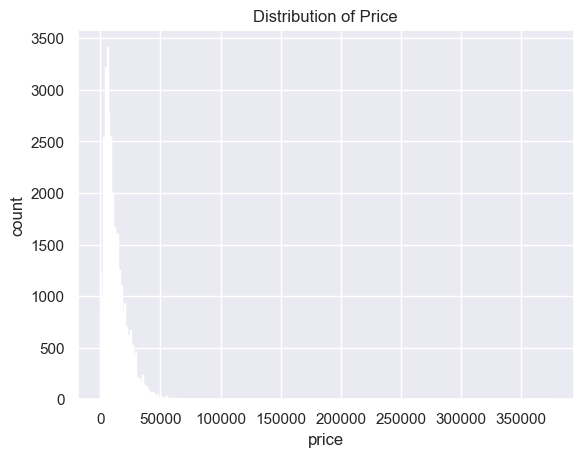

In [612]:
data.hist('price', bins = 500)
plt.title('Distribution of Price')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

The histogram shows that  'price' has right-skewed distribution, it's mean > median.

In [613]:
data['price'].mean()>data['price'].median()


True

Number of values is so big(3425) that it's impossible to see outliers:

In [614]:
data['price'].nunique()

3425

Maximum price values can't be seen, high values are scarce. Let's zoom the picture.

Text(0, 0.5, 'count')

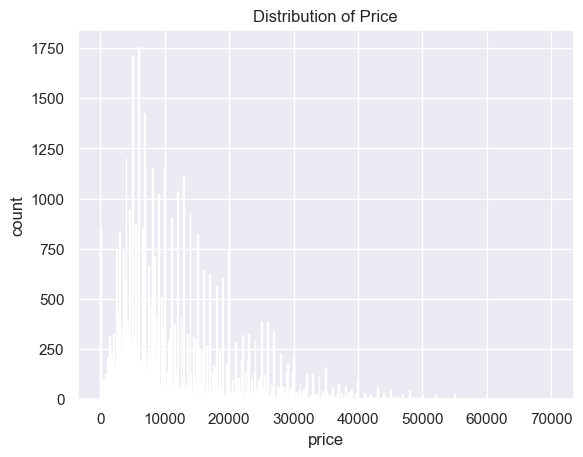

In [615]:
data.hist('price', bins = 500, range = (0,70000))
plt.title('Distribution of Price')
plt.xlabel('price')
plt.ylabel('count')

Now the picture is more clear.  The most frequent price(peak) is around 6000,
the median and the mean should be higher.Let's check values with describe method.

In [616]:
data['price'].describe().astype(int)



count     50962
mean      12131
std       10042
min           1
25%        5000
50%        9000
75%       16800
max      375000
Name: price, dtype: int32

The range of values for price is very big, from 1 to 375000. Let's check extreme values.

In [617]:
data[data.price==data.price.min()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310,automatic,coupe,unknown,0.0,2018-07-14,29,chevrolet camaro,3,2018,7,5,4.1,17393.0
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000,automatic,pickup,unknown,1.0,2018-10-11,49,chevrolet silverado,2,2018,10,3,20.1,8159.0
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200,automatic,SUV,red,0.0,2019-03-18,63,chevrolet tahoe,2,2019,3,0,12.1,17.0
3902,1,1996.0,ford f-150,fair,8.0,gas,163000,manual,truck,white,0.0,2019-02-23,54,ford f-150,1,2019,2,5,23.1,7056.0
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000,automatic,pickup,unknown,1.0,2019-02-04,14,chevrolet silverado,3,2019,2,0,15.1,5497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,140781,automatic,SUV,black,1.0,2018-08-06,28,chevrolet trailblazer,3,2018,8,0,11.1,12683.0
49709,1,NaN,ford f150,excellent,8.0,gas,139700,other,pickup,red,1.0,2019-03-11,18,ford f-150,3,2019,3,0,NaN,NaN
50245,1,1986.0,chevrolet silverado,good,8.0,gas,93500,automatic,truck,red,1.0,2018-11-30,50,chevrolet silverado,2,2018,11,4,32.1,2913.0
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300,automatic,pickup,black,1.0,2019-04-12,28,gmc sierra 2500hd,2,2019,4,4,16.1,13186.0


In [618]:
data[data.price==data.price.max()]



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
12504,375000,1999.0,nissan frontier,good,6.0,gas,115000,automatic,pickup,blue,1.0,2018-05-19,21,nissan frontier,2,2018,5,5,19.1,6021.0


 There are obviously many outliers, but how to define them? 
 First, let's use **boxplot and IQR approach**.

<div class="alert alert-info">
<b>  Student's comment</b>

We are told to ckeck it, compare and choose the best way, just for practice. <div class="alert alert-info">

</div>

<AxesSubplot:xlabel='price'>

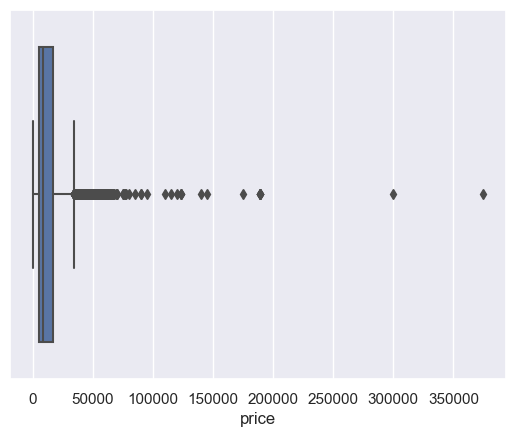

In [619]:
sns.boxplot(x=data['price'])

There are outliers outside the whiskers on this seaborn boxplot, but the whole picture is not clear.
Let's set the “showfliers” parameter  to False:

<AxesSubplot:xlabel='price'>

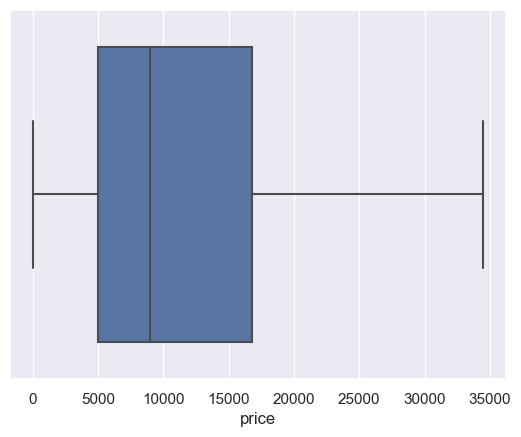

In [620]:
sns.boxplot(x=data['price'],showfliers = False)

In [621]:
data.price.describe().astype('int')

count     50962
mean      12131
std       10042
min           1
25%        5000
50%        9000
75%       16800
max      375000
Name: price, dtype: int32

The borders(whiskers) are determined with Q1,Q3 and IQR:

In [622]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
min_iqr=Q1-1.5*IQR
max_iqr=Q3+1.5*IQR
print('min border:',min_iqr)
print('max border:',max_iqr)

5000.0
16800.0
min border: -12700.0
max border: 34500.0


We get negative value for the min border because the price distribution is not normal, 
it starts around 0 and has a big right skew. So the actual min border = min price and there are
no outliers below the min border.

For describing parameters and defining outliers **with boxplot let's create a function:**

In [623]:
def distribution_IQR(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    Q1 = data[parameter].quantile(0.25)
    Q3 = data[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:',min_iqr)
    print('max border:',max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print('The outliers are considered to be values above',max_iqr)
        print('We have',len(data[data[parameter]>max_iqr]),"values that we can consider outliers")
    else:
        print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)
        print('We have',len(data[(data[parameter]<min_iqr)|(data[parameter]>max_iqr)]),"values that we can consider outliers")

Let's take another approach and try to **define outliers with percentile**

Upper bound found with boxplot(34500) is almost equal to 97th percentile:

In [624]:
np.percentile(data.price, 97)

34968.549999999974

In [625]:
np.percentile(data.price, 98)

37998.119999999995

In [626]:
np.percentile(data.price, 3)

1000.0

In [627]:
np.percentile(data.price, 2)

371.0

In [628]:
np.percentile(data.price, 5)

1950.0

In [629]:
np.percentile(data.price, 1)

1.0

1% is too low, 5% percentile seems to be too high limit (it would cut off prices below 1950$ as outliers, but they can be 
normal for old used cars). Let's take a closer look at 2%percentile

In [630]:
data[data['price'] < np.percentile(data.price, 2)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310,automatic,coupe,unknown,0.0,2018-07-14,29,chevrolet camaro,3,2018,7,5,4.1,17393.0
406,288,2018.0,nissan altima,excellent,4.0,gas,40277,automatic,sedan,silver,0.0,2018-10-19,37,nissan altima,3,2018,10,4,0.1,402770.0
632,299,2004.0,toyota camry,excellent,4.0,gas,185234,automatic,sedan,silver,0.0,2018-08-12,42,toyota camry,3,2018,8,6,14.1,13137.0
844,111,2003.0,ford mustang,good,8.0,other,115224,manual,coupe,red,0.0,2018-09-14,24,ford mustang,2,2018,9,4,15.1,7631.0
1567,233,2007.0,chevrolet silverado 1500,excellent,8.0,gas,132782,automatic,truck,unknown,0.0,2018-11-16,9,chevrolet silverado 1500,3,2018,11,4,11.1,11962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50430,5,2011.0,toyota sienna,good,6.0,gas,127020,automatic,SUV,green,0.0,2018-12-03,5,toyota sienna,2,2018,12,0,7.1,17890.0
50819,299,NaN,toyota camry,excellent,4.0,gas,185634,automatic,sedan,silver,0.0,2019-01-31,39,toyota camry,3,2019,1,3,NaN,NaN
50971,10,2012.0,toyota prius,excellent,4.0,hybrid,101000,automatic,hatchback,green,0.0,2019-03-16,29,toyota prius,3,2019,3,5,7.1,14225.0
51256,1,2012.0,honda civic lx,excellent,4.0,gas,71262,automatic,sedan,blue,0.0,2018-05-06,53,honda civic lx,3,2018,5,6,6.1,11682.0


In [631]:
data[data['price'] < np.percentile(data.price, 2)]['price'].describe()

count    1019.000000
mean       43.560353
std        91.425735
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       359.000000
Name: price, dtype: float64

In [632]:
data[data['price'] < np.percentile(data.price, 2)]['condition'].value_counts()

excellent    895
like new      66
good          36
fair          15
new            7
Name: condition, dtype: int64

<a id="salvage_cut"></a>

1019 cars with price less than 360$, **none of them in salvage condition** !

In [633]:
data[data['price'] < np.percentile(data.price, 3)]['condition'].value_counts()

excellent    973
fair         183
good         105
like new      94
salvage       28
new            7
Name: condition, dtype: int64

Cars in 'salvage' condition appear witin 3% percentile and their low price is absolutely adequate. But the 
majority of cars below 2% percentile is in very good condition(from good to new, there're no salvage cars)
so such a low price is unreal.
Let's cut them as outliers. We do not cut off any of salvage cars!

Let's define **borders for outliers for price as 2nd and 98th percentiles**.

For describing parameters and finding outliers with **percentile method** let's create a function:

In [634]:
def distribution_percentile_2(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    #data[parameter].describe()
    ninety_eight = np.percentile(data[parameter], 98)
    two = np.percentile(data[parameter], 2)
    print('---------------------------------------')
    print('min border:',two)
    print('max border:',ninety_eight)
    print('---------------------------------------')
    print('The outliers are considered to be values below',two, "and above",ninety_eight)
    print('We have',len(data[(data[parameter]<two)|(data[parameter]>ninety_eight)]),"values that we can consider outliers")

## 'car_age'

Text(0, 0.5, 'count')

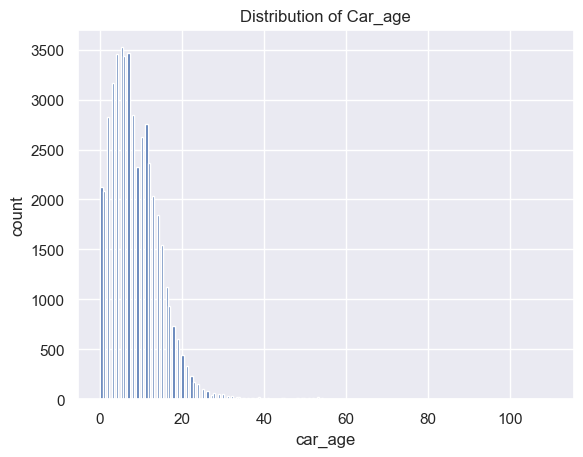

In [635]:
data.hist('car_age', bins = 200 )
plt.title('Distribution of Car_age')
plt.xlabel('car_age')
plt.ylabel('count')

The distribution of 'car_age' is right-skewed, mean >median. Number of unique values is too big to see details. Let's zoom the picture.

Text(0, 0.5, 'count')

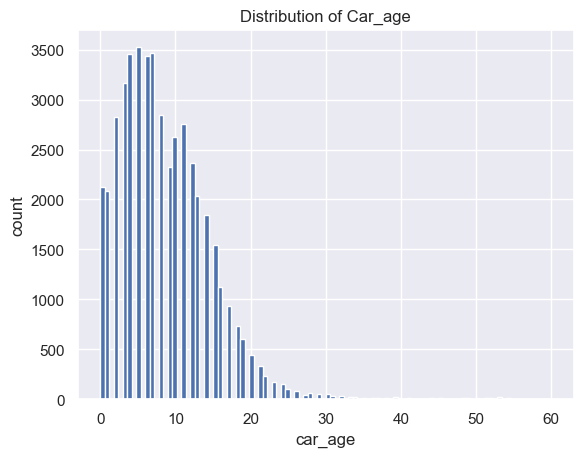

In [636]:
data.hist('car_age', bins = 100, range=(0, 60) )
plt.title('Distribution of Car_age')
plt.xlabel('car_age')
plt.ylabel('count')

Most often people sell 4-6 year old cars. New cars are ok (car_age around 0), the upper values go beyond 50.

<AxesSubplot:xlabel='car_age'>

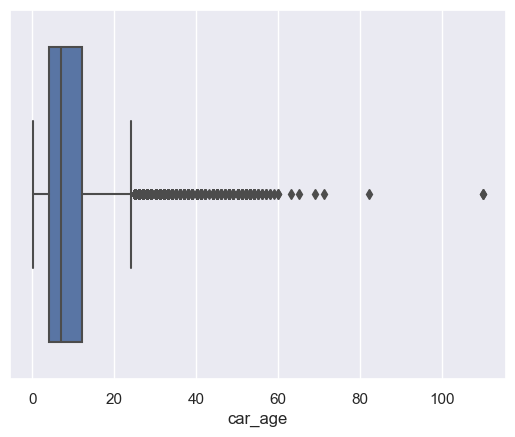

In [637]:
sns.boxplot(x=data['car_age'])

<AxesSubplot:xlabel='car_age'>

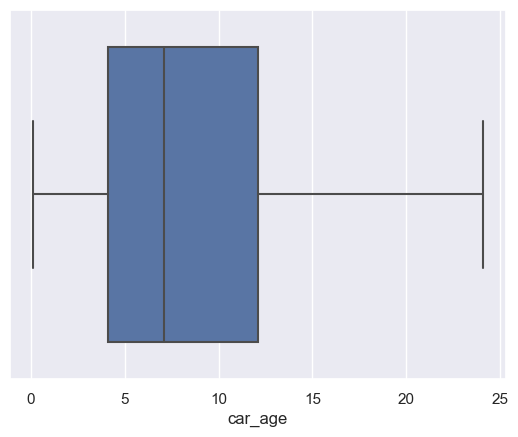

In [638]:
sns.boxplot(x=data['car_age'] , showfliers = False)

In [639]:
data['car_age'].mean()>data['car_age'].median()

True

In [640]:
data.car_age.nunique()

67

In [641]:
data.car_age.describe()

count    47905.000000
mean         8.655287
std          6.284593
min          0.100000
25%          4.100000
50%          7.100000
75%         12.100000
max        110.100000
Name: car_age, dtype: float64

Half of all cars sold are 7 years old and less, while the mean value is 8.44. Check extreme car_age values.

In [642]:
data[data.car_age<1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
19,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932,automatic,sedan,red,0.0,2018-08-25,27,hyundai elantra,3,2018,8,5,0.1,319320.0
71,23300,2018.0,nissan frontier crew cab sv,good,6.0,gas,27493,other,pickup,unknown,1.0,2018-10-13,36,nissan frontier crew cab sv,2,2018,10,5,0.1,274930.0
78,23800,2019.0,nissan frontier crew cab sv,good,6.0,gas,10899,other,pickup,silver,1.0,2019-02-28,30,nissan frontier crew cab sv,2,2019,2,3,0.1,108990.0
99,39950,2018.0,chevrolet silverado,excellent,8.0,gas,18500,automatic,truck,unknown,1.0,2018-08-05,16,chevrolet silverado,3,2018,8,6,0.1,185000.0
106,21500,2019.0,nissan frontier crew cab sv,good,6.0,gas,16168,other,pickup,white,0.0,2019-03-29,70,nissan frontier crew cab sv,2,2019,3,4,0.1,161680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018.0,ram 1500,excellent,8.0,gas,9446,automatic,truck,unknown,1.0,2018-05-06,39,ram 1500,3,2018,5,6,0.1,94460.0
51442,28990,2018.0,ford f150,excellent,6.0,gas,10152,automatic,truck,white,1.0,2018-06-13,47,ford f-150,3,2018,6,2,0.1,101520.0
51446,15999,2018.0,chevrolet malibu,excellent,4.0,gas,50502,automatic,sedan,black,0.0,2018-07-28,8,chevrolet malibu,3,2018,7,5,0.1,505020.0
51447,33990,2019.0,ram 1500,excellent,8.0,gas,9000,automatic,truck,white,1.0,2019-01-25,36,ram 1500,3,2019,1,4,0.1,90000.0


These new cars should be in excellent or like new condition, aren't they? Let's make sure.

In [643]:
data[data.car_age<1]['condition'].value_counts()

excellent    995
like new     536
good         517
new           74
salvage        4
fair           2
Name: condition, dtype: int64

Oh, there are also new cars in fair and salvage condition. Car accidents? Fortunately, not so often. Maybe just an error.

In [644]:
data[data.car_age==data.car_age.max()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328,automatic,SUV,black,0.0,2018-07-06,34,gmc yukon,2,2018,7,4,110.1,1538.0
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,169328,automatic,SUV,white,0.0,2018-06-24,25,cadillac escalade,3,2018,6,6,110.1,1538.0


Maximum age 110 years - old cars with automatic transmission in good and excellent condition! 
Sold in a month. But gmc yucon didn't exist before 1991 and cadillac escalade until 1999, so
**that's an error**! It will be cut off with outliers.

Where do outliers begin? On the box plot the upper whisker almost reaches the value of 25. Check.

In [645]:
data[data['car_age'] > 25]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
63,30000,1966.0,ford mustang,excellent,8.0,gas,51000,manual,convertible,red,0.0,2019-01-23,17,ford mustang,3,2019,1,2,53.1,960.0
140,2000,1993.0,ford f-150,good,8.0,gas,258225,automatic,truck,red,0.0,2019-03-06,34,ford f-150,2,2019,3,2,26.1,9894.0
255,5500,1981.0,chevrolet corvette,fair,8.0,gas,75000,automatic,coupe,blue,0.0,2019-01-15,49,chevrolet corvette,1,2019,1,1,38.1,1969.0
357,16600,1975.0,chevrolet corvette,excellent,8.0,gas,75000,manual,coupe,unknown,0.0,2019-03-09,69,chevrolet corvette,3,2019,3,5,44.1,1701.0
358,18400,1975.0,chevrolet corvette,excellent,8.0,gas,18000,automatic,coupe,orange,0.0,2019-01-06,41,chevrolet corvette,3,2019,1,6,44.1,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51063,5500,1990.0,gmc sierra 1500,fair,8.0,gas,312000,automatic,truck,blue,1.0,2018-07-13,21,gmc sierra 1500,1,2018,7,4,28.1,11103.0
51152,3900,1988.0,ford f350,good,8.0,gas,30000,automatic,truck,unknown,0.0,2018-08-27,43,ford f-350,2,2018,8,0,30.1,997.0
51176,2500,1993.0,toyota 4runner,fair,6.0,gas,288662,manual,offroad,black,1.0,2019-03-16,39,toyota 4runner,1,2019,3,5,26.1,11060.0
51325,2800,1989.0,ford ranger,good,5.0,gas,220000,manual,truck,black,1.0,2018-10-27,37,ford ranger,2,2018,10,5,29.1,7560.0


Let's check 98th percentile.

In [646]:
np.nanpercentile(data.car_age, 98)

23.1

In [647]:
data[data['car_age'] > np.nanpercentile(data.car_age, 98)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
63,30000,1966.0,ford mustang,excellent,8.0,gas,51000,manual,convertible,red,0.0,2019-01-23,17,ford mustang,3,2019,1,2,53.1,960.0
73,1900,1994.0,jeep grand cherokee laredo,good,6.0,gas,207,automatic,SUV,grey,1.0,2018-07-27,9,jeep grand cherokee laredo,2,2018,7,4,24.1,9.0
140,2000,1993.0,ford f-150,good,8.0,gas,258225,automatic,truck,red,0.0,2019-03-06,34,ford f-150,2,2019,3,2,26.1,9894.0
255,5500,1981.0,chevrolet corvette,fair,8.0,gas,75000,automatic,coupe,blue,0.0,2019-01-15,49,chevrolet corvette,1,2019,1,1,38.1,1969.0
328,10000,1995.0,chevrolet corvette,good,8.0,gas,127807,automatic,coupe,unknown,0.0,2019-01-08,30,chevrolet corvette,2,2019,1,1,24.1,5303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51063,5500,1990.0,gmc sierra 1500,fair,8.0,gas,312000,automatic,truck,blue,1.0,2018-07-13,21,gmc sierra 1500,1,2018,7,4,28.1,11103.0
51152,3900,1988.0,ford f350,good,8.0,gas,30000,automatic,truck,unknown,0.0,2018-08-27,43,ford f-350,2,2018,8,0,30.1,997.0
51176,2500,1993.0,toyota 4runner,fair,6.0,gas,288662,manual,offroad,black,1.0,2019-03-16,39,toyota 4runner,1,2019,3,5,26.1,11060.0
51325,2800,1989.0,ford ranger,good,5.0,gas,220000,manual,truck,black,1.0,2018-10-27,37,ford ranger,2,2018,10,5,29.1,7560.0


 98th percentile would cut off 888 rows - not many more than the upper whisker.

For car age it's better to take boxplot approach, it doesn't cut off new cars.

## 'odometer'

Text(0, 0.5, 'count')

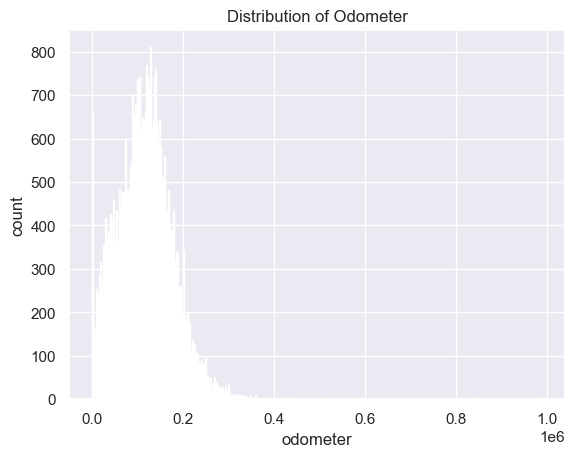

In [648]:
data.hist('odometer', bins = 500 )
plt.title('Distribution of Odometer')
plt.xlabel('odometer')
plt.ylabel('count')

Text(0, 0.5, 'count')

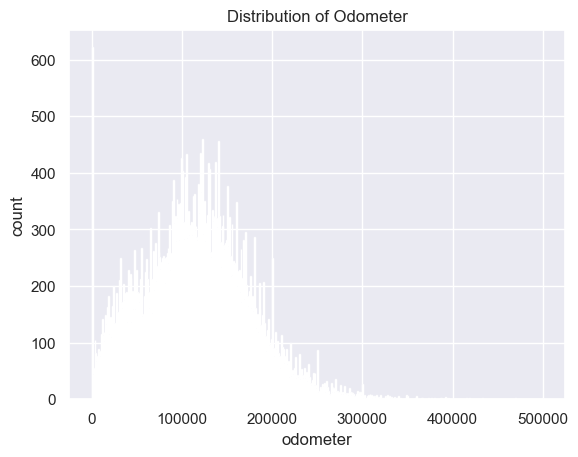

In [649]:
data.hist('odometer', bins = 500, range=(0, 500000) )
plt.title('Distribution of Odometer')
plt.xlabel('odometer')
plt.ylabel('count')

In [650]:
data.odometer.nunique()

18198

In [651]:
data['odometer'].mean()>data['odometer'].median()

True

'Odometer' distribution is a little right-skewed with many upper outliers. 
The difference between the mean and the median is not so big.

In [652]:
data.odometer.describe().astype('int')

count     50962
mean     115912
std       62517
min           5
25%       72693
50%      114342
75%      154000
max      990000
Name: odometer, dtype: int32

In [653]:
data[data.odometer==data.odometer.max()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
17869,59900,1964.0,chevrolet corvette,like new,8.0,gas,990000,automatic,convertible,red,0.0,2018-06-17,28,chevrolet corvette,4,2018,6,6,54.1,18299.0
40729,4700,2013.0,chevrolet cruze,good,6.0,gas,990000,automatic,sedan,black,0.0,2018-05-02,4,chevrolet cruze,2,2018,5,2,5.1,194118.0


In [654]:
data[data.odometer==data.odometer.min()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
28874,50025,2019.0,chevrolet silverado 2500hd,new,8.0,gas,5,automatic,truck,red,1.0,2019-03-08,2,chevrolet silverado 2500hd,5,2019,3,4,0.1,50.0
29219,56004,2019.0,chevrolet silverado 2500hd,new,8.0,diesel,5,automatic,truck,silver,1.0,2019-02-02,24,chevrolet silverado 2500hd,5,2019,2,5,0.1,50.0
29221,30000,2018.0,chevrolet silverado 1500,new,4.0,gas,5,automatic,truck,red,0.0,2018-10-18,56,chevrolet silverado 1500,5,2018,10,3,0.1,50.0
29407,64493,2018.0,chevrolet silverado 3500hd,new,8.0,diesel,5,automatic,truck,grey,1.0,2018-09-22,74,chevrolet silverado 3500hd,5,2018,9,5,0.1,50.0
38199,64493,2018.0,chevrolet silverado 3500hd,new,8.0,diesel,5,automatic,truck,white,1.0,2018-06-11,39,chevrolet silverado 3500hd,5,2018,6,0,0.1,50.0
38268,36494,2018.0,chevrolet silverado 1500,new,8.0,gas,5,automatic,truck,black,1.0,2018-12-01,12,chevrolet silverado 1500,5,2018,12,5,0.1,50.0
38270,36347,2018.0,chevrolet silverado 1500,new,8.0,gas,5,automatic,truck,unknown,1.0,2018-09-16,17,chevrolet silverado 1500,5,2018,9,6,0.1,50.0
38271,36347,2019.0,chevrolet silverado 1500,new,8.0,gas,5,automatic,truck,blue,1.0,2019-03-03,21,chevrolet silverado 1500,5,2019,3,6,0.1,50.0
38274,36262,2018.0,chevrolet silverado 1500,new,8.0,gas,5,automatic,truck,white,1.0,2018-12-10,32,chevrolet silverado 1500,5,2018,12,0,0.1,50.0


New cars have min odometer value  and that is quite ok, so outliers can be only upper values.
It's better to take boxplot approach to find outliers for 'odometer' parameter.

## 'cylinders'

Text(0.5, 1.0, 'Distribution of Cylinders')

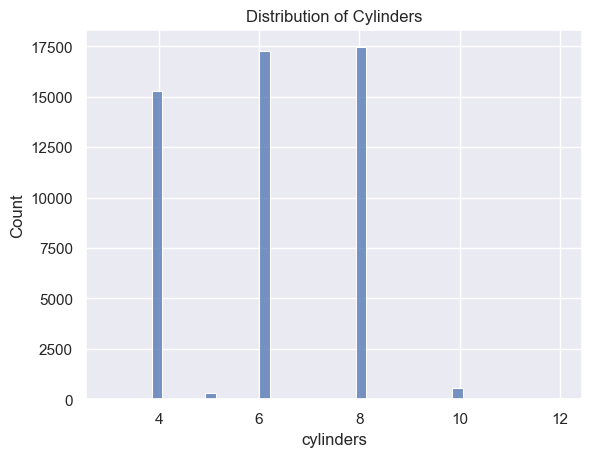

In [655]:
sns.histplot(data=data, x="cylinders")
plt.title('Distribution of Cylinders')

The distribution seems to be normal. The mean should be equal to the median. 

In [656]:
data.cylinders.value_counts()

8.0     17453
6.0     17289
4.0     15306
10.0      555
5.0       311
3.0        34
7.0        10
12.0        2
4.5         1
5.5         1
Name: cylinders, dtype: int64

In [657]:
data.cylinders.describe()

count    50962.000000
mean         6.120109
std          1.656771
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

<AxesSubplot:xlabel='cylinders'>

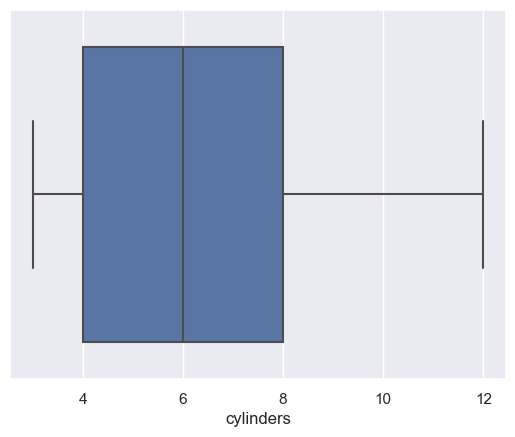

In [658]:
sns.boxplot(x=data['cylinders'] , showfliers = False)

This boxplot shows that all values come within the whiskers' range.
It approves our conclusion that there are no outliers.

## 'condition_rg'

Text(0.5, 1.0, 'Distribution of Condition')

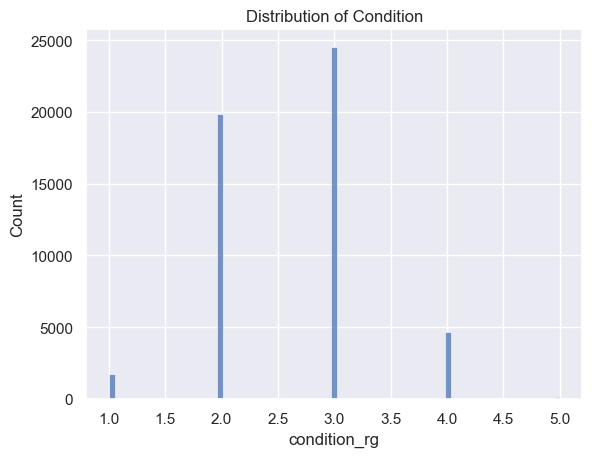

In [659]:
sns.histplot(data=data, x="condition_rg")
plt.title('Distribution of Condition')

<div class="alert alert-info">
<b2> Student's comment</b2>

Yes, but in the unstruction they ask to plot histograms for all core parameters. 
And the picture is quite clear.
</div>

In [660]:
data.condition_rg.describe()

count    50962.000000
mean         2.640458
std          0.705865
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_rg, dtype: float64

The destribution has a little left skew, The mean is less than  the median. Only 5 unique values,
expressed by numbers, but they are categorical. Values 1 and 5 are not so numerous, but they represent
special groops of data and shouldn't be cut off.
No outliers.

# Study and treat outliers



We saw that our core parameters have different types of distribution. For 'price' it's better to use
percentile approach, for 'car_age' and 'odometer' IQR approach fits best, while 'cylinders' and 'condition_rg' have no outliers.

The histogram of: price


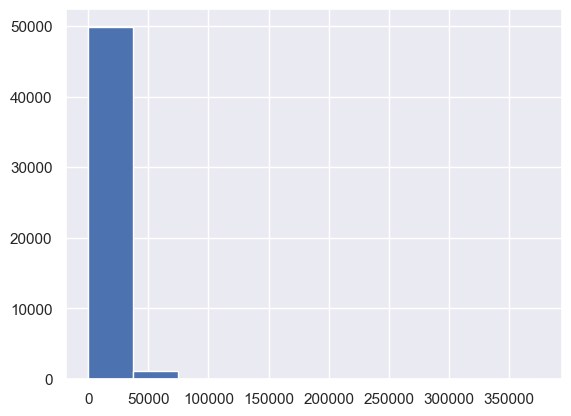

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     50962.000000
mean      12131.583160
std       10042.945319
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16800.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 371.0
max border: 37998.119999999995
---------------------------------------
The outliers are considered to be values below 371.0 and above 37998.119999999995
We have 2039 values that we can consider outliers


In [661]:
distribution_percentile_2('price')

The histogram of: car_age


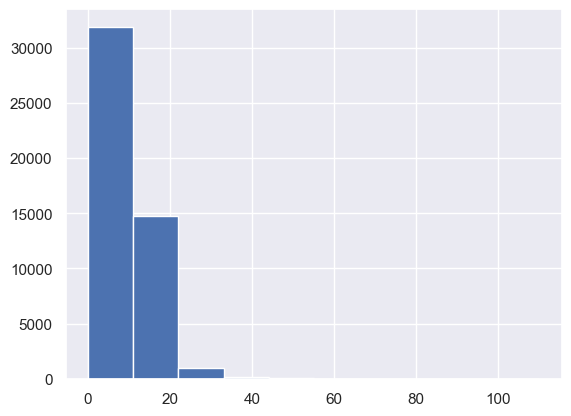

The distribution is skewed to the right
---------------------------------------
Statistics on: car_age
count    47905.000000
mean         8.655287
std          6.284593
min          0.100000
25%          4.100000
50%          7.100000
75%         12.100000
max        110.100000
Name: car_age, dtype: float64
---------------------------------------
min border: -7.9
max border: 24.1
---------------------------------------
The outliers are considered to be values above 24.1
We have 736 values that we can consider outliers
The histogram of: odometer


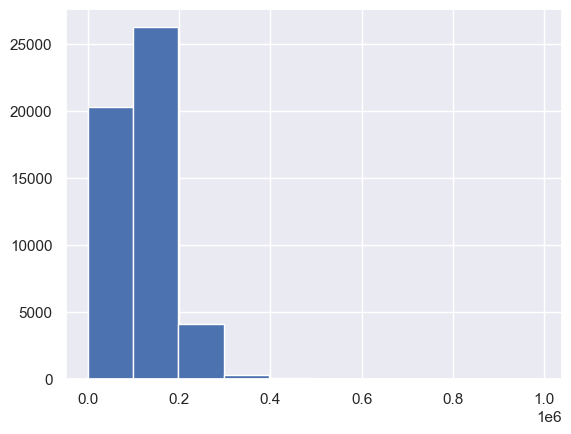

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     50962.000000
mean     115912.381755
std       62517.841914
min           5.000000
25%       72693.000000
50%      114342.500000
75%      154000.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -49267.5
max border: 275960.5
---------------------------------------
The outliers are considered to be values above 275960.5
We have 579 values that we can consider outliers


In [662]:
for parameter in ['car_age', 'odometer']:
    distribution_IQR(parameter)

Let's make a list of borders for the three parameters and then save it as a border_data dataframe.

In [663]:

border_list=[['price', 371, 37997],['car_age', 0, 24.1],['odometer',0, 272122]]


In [664]:
border_data=pd.DataFrame(border_list,columns=['parameter','min_border','max_border'])
border_data

,parameter,min_border,max_border
0,price,371,37997.0
1,car_age,0,24.1
2,odometer,0,272122.0


Filters will cut off outliers and create a subset for data without outliers.

In [665]:
subset=data.query('price >= 371 & price <= 37997 & car_age < = 24.1 & odometer <= 272122')
subset

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,bmw x5,2,2018,6,5,7.1,20423.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,hyundai sonata,4,2019,2,3,6.1,18033.0
3,1500,2003.0,ford f-150,fair,8.0,gas,168049,automatic,pickup,unknown,0.0,2019-03-22,9,ford f-150,1,2019,3,4,16.1,10438.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,chrysler 200,3,2019,4,1,2.1,38525.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,chrysler 300,3,2018,6,2,4.1,14135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136,automatic,sedan,black,0.0,2018-10-03,37,nissan maxima,4,2018,10,2,5.1,17282.0
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500,automatic,sedan,white,0.0,2018-11-14,22,honda civic,1,2018,11,2,16.1,11273.0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000,automatic,sedan,blue,0.0,2018-11-15,32,hyundai sonata,3,2018,11,3,9.1,14066.0
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573,automatic,sedan,black,0.0,2018-07-02,71,toyota corolla,2,2018,7,0,5.1,27367.0


**subset is now our clean dataset where outliers 
for price, car age and odometer parameters have been cut off**.

In [666]:
subset

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,bmw x5,2,2018,6,5,7.1,20423.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,hyundai sonata,4,2019,2,3,6.1,18033.0
3,1500,2003.0,ford f-150,fair,8.0,gas,168049,automatic,pickup,unknown,0.0,2019-03-22,9,ford f-150,1,2019,3,4,16.1,10438.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,chrysler 200,3,2019,4,1,2.1,38525.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,chrysler 300,3,2018,6,2,4.1,14135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136,automatic,sedan,black,0.0,2018-10-03,37,nissan maxima,4,2018,10,2,5.1,17282.0
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500,automatic,sedan,white,0.0,2018-11-14,22,honda civic,1,2018,11,2,16.1,11273.0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000,automatic,sedan,blue,0.0,2018-11-15,32,hyundai sonata,3,2018,11,3,9.1,14066.0
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573,automatic,sedan,black,0.0,2018-07-02,71,toyota corolla,2,2018,7,0,5.1,27367.0


In [667]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44705 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           44705 non-null  int64         
 1   model_year      44705 non-null  float64       
 2   model           44705 non-null  object        
 3   condition       44705 non-null  object        
 4   cylinders       44705 non-null  float64       
 5   fuel            44705 non-null  object        
 6   odometer        44705 non-null  int32         
 7   transmission    44705 non-null  object        
 8   type            44705 non-null  object        
 9   paint_color     44705 non-null  object        
 10  is_4wd          44705 non-null  float64       
 11  date_posted     44705 non-null  datetime64[ns]
 12  days_listed     44705 non-null  int64         
 13  model_flt       44705 non-null  object        
 14  condition_rg    44705 non-null  int64         
 15  ye

In [668]:
print(len(subset))

subset[['price', 'car_age', 'odometer', 'cylinders', 'condition_rg']].describe().loc[['min', 'max']]

44705


,price,car_age,odometer,cylinders,condition_rg
min,371.0,0.1,5.0,3.0,1.0
max,37995.0,24.1,272000.0,12.0,5.0


## Study core parameters without outliers

Now the filtered data give us new plots that differ from the the earlier ones that included outliers.

Text(0, 0.5, 'count')

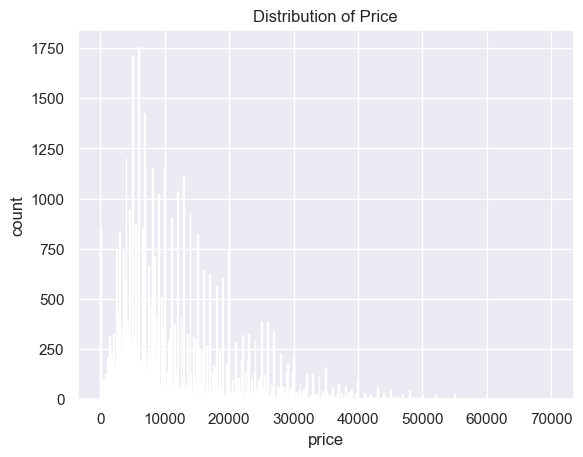

In [669]:
data.hist('price', bins = 500, range = (0,70000)) 
plt.title('Distribution of Price')
plt.xlabel('price')
plt.ylabel('count')

In [670]:
subset.price.describe()

count    44705.000000
mean     11782.290616
std       8160.965574
min        371.000000
25%       5495.000000
50%       9495.000000
75%      16500.000000
max      37995.000000
Name: price, dtype: float64

The range of price values is almost 10 times less now, so the picture became more readable.
The mean value became lower, the median got higher, so the difference between them became smaller. 
The distribution remaines right-skewed.

Text(0, 0.5, 'count')

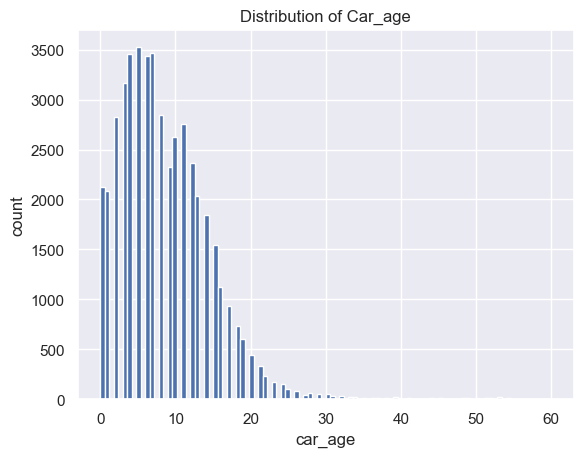

In [671]:
data.hist('car_age', bins = 100, range=(0, 60) )
plt.title('Distribution of Car_age')
plt.xlabel('car_age')
plt.ylabel('count')

In [672]:
subset.car_age.describe()

count    44705.000000
mean         8.416475
std          5.185483
min          0.100000
25%          4.100000
50%          8.100000
75%         12.100000
max         24.100000
Name: car_age, dtype: float64

The maximum car_age value is now much lower, number of values is not so big
(3497 values were cut off by filters - 6.86%), so the whole picture is clearer.
The mean got smaller, the median is the same, so the differance between them got smaller too.
The distribution remaines right-skewed.

Text(0, 0.5, 'count')

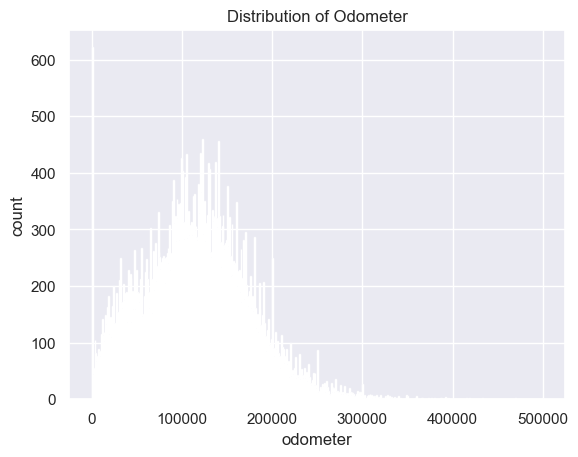

In [673]:
data.hist('odometer', bins = 500, range=(0, 500000) )
plt.title('Distribution of Odometer')
plt.xlabel('odometer')
plt.ylabel('count')

In [674]:
subset.odometer.describe()

count     44705.000000
mean     116008.268046
std       55976.820419
min           5.000000
25%       76500.000000
50%      116187.000000
75%      153510.000000
max      272000.000000
Name: odometer, dtype: float64

Again, the range of odometer values became 4 times more compact, the picture is more clear.
The mean was a little greater than the median(115699 VS 114250), now they are almost equal (116008 VS 116182). 
Now odometer distribution is almost symmetric, normal.

Text(0.5, 1.0, 'Distribution of Cylinders')

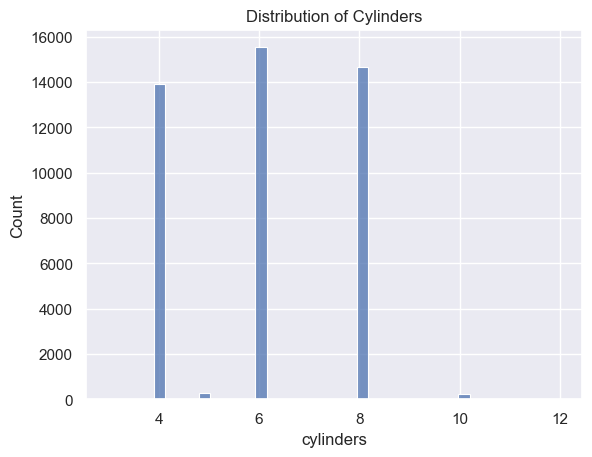

In [675]:
sns.histplot(data=subset, x="cylinders")
plt.title('Distribution of Cylinders')

Text(0.5, 1.0, 'Distribution of Condition')

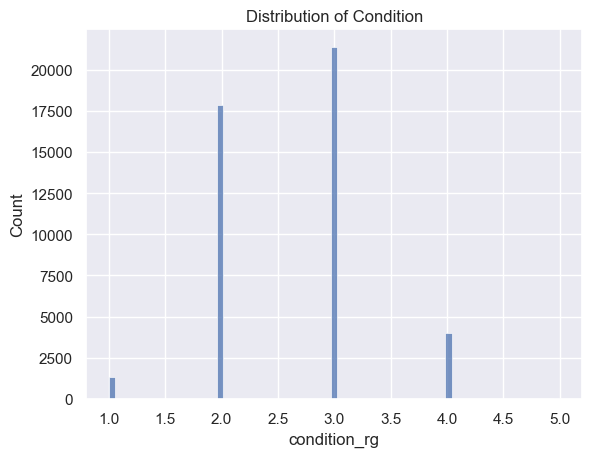

In [676]:
sns.histplot(data=subset, x="condition_rg")
plt.title('Distribution of Condition')

The two parameters that had no outliers are now almost the same as they were with unfiltered dataset.
'cylinders' and 'condition_rg' remain normally distributed.

# Ads lifetime

Parameter `days_listed` shows how many days advertisements were displayed. Some cars are sold quickly, some have to wait a long time.  Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [677]:
subset.days_listed.describe()

count    44705.000000
mean        39.569176
std         28.206867
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The mean value is almost 40 days, the median is just 33. The distribution is right-skewed.

Text(0.5, 1.0, 'Distribution of "days_listed"')

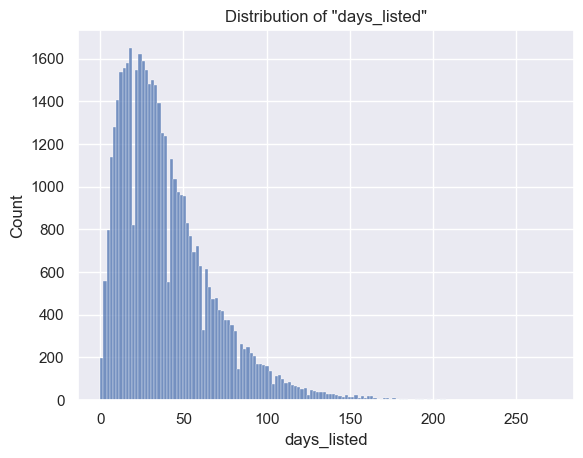

In [678]:
sns.histplot(data=subset, x="days_listed")
plt.title('Distribution of "days_listed"')

Naturally, the min value is 0, when the car is sold right after the ad was placed. **Most often cars are sold in around 25 days (the peak on the plot - moda).50% of of cars are sold by the 33th day, the other half is spread up to 271 days**. Why?
Examine minimum values.

In [679]:
subset[subset['days_listed'] < 2]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
39,8000,2009.0,ford f-150,good,8.0,gas,234000,automatic,truck,black,1.0,2019-03-31,1,ford f-150,2,2019,3,6,10.1,23168.0
173,21100,2017.0,chevrolet camaro lt coupe 2d,good,6.0,gas,24510,other,coupe,red,0.0,2019-03-29,1,chevrolet camaro lt coupe 2d,2,2019,3,4,2.1,11671.0
460,8990,2016.0,nissan rogue,excellent,4.0,gas,121635,automatic,SUV,grey,0.0,2018-12-14,1,nissan rogue,3,2018,12,4,2.1,57921.0
810,21900,2016.0,nissan frontier crew cab sv,good,6.0,gas,4998,other,pickup,unknown,0.0,2018-05-24,1,nissan frontier crew cab sv,2,2018,5,3,2.1,2380.0
910,6995,2005.0,subaru outback,excellent,4.0,gas,113000,automatic,wagon,green,1.0,2018-06-05,1,subaru outback,3,2018,6,1,13.1,8626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50051,2500,1999.0,gmc sierra 1500,good,8.0,gas,216000,automatic,pickup,white,0.0,2019-02-02,1,gmc sierra 1500,2,2019,2,5,20.1,10746.0
51061,3500,2010.0,nissan altima,good,4.0,gas,167800,automatic,sedan,custom,0.0,2019-02-01,1,nissan altima,2,2019,2,4,9.1,18440.0
51297,19500,2011.0,chevrolet silverado 1500,good,8.0,gas,81463,automatic,truck,grey,1.0,2018-05-17,1,chevrolet silverado 1500,2,2018,5,3,7.1,11474.0
51359,2999,2004.0,ford taurus,good,6.0,gas,136000,automatic,sedan,unknown,0.0,2018-10-22,0,ford taurus,2,2018,10,0,14.1,9645.0


In [680]:
subset[subset['days_listed'] < 2]['condition'].value_counts()

excellent    94
good         77
like new     24
fair          4
Name: condition, dtype: int64

In [681]:
subset[subset['days_listed'] < 2]['model_year'].value_counts()

2013.0    24
2017.0    16
2014.0    13
2008.0    13
2015.0    13
2011.0    13
2012.0    11
2010.0    10
2007.0    10
2018.0     9
2016.0     9
2009.0     8
2004.0     8
2005.0     8
2003.0     7
2006.0     7
2002.0     6
2001.0     3
2000.0     3
1998.0     2
1999.0     2
2019.0     2
1996.0     2
Name: model_year, dtype: int64

Among the happy cars sold in 1-2 days there are cars of different age (not oly new) and condition
(mostly excellent and good, but not always).

Let's now take a look at long-waiting cars.

In [682]:
subset[subset['days_listed'] > 200]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
51,3800,2012.0,ford focus,good,4.0,gas,130323,automatic,sedan,black,0.0,2018-11-29,261,ford focus,2,2018,11,3,6.1,21364.0
2224,5995,2004.0,ford f-250,good,8.0,gas,103000,automatic,truck,red,1.0,2019-01-24,263,ford f-250,2,2019,1,3,15.1,6821.0
3202,5995,2009.0,toyota prius,excellent,4.0,gas,130000,automatic,hatchback,blue,0.0,2018-10-17,244,toyota prius,3,2018,10,2,9.1,14286.0
4360,5200,2011.0,chevrolet impala,like new,6.0,gas,122000,automatic,sedan,unknown,0.0,2018-05-24,271,chevrolet impala,4,2018,5,3,7.1,17183.0
5640,6900,2011.0,kia sorento,good,4.0,gas,130651,automatic,wagon,grey,1.0,2018-07-12,201,kia sorento,2,2018,7,3,7.1,18402.0
9630,8995,2008.0,toyota highlander,like new,6.0,gas,156000,automatic,SUV,unknown,1.0,2018-10-03,207,toyota highlander,4,2018,10,2,10.1,15446.0
10650,17700,2015.0,nissan frontier crew cab sv,good,6.0,gas,67071,other,pickup,black,0.0,2019-01-20,206,nissan frontier crew cab sv,2,2019,1,6,4.1,16359.0
11698,21995,2019.0,chevrolet impala,like new,6.0,gas,39255,automatic,sedan,black,0.0,2019-02-24,236,chevrolet impala,4,2019,2,6,0.1,392550.0
14591,25988,2016.0,chevrolet silverado,excellent,8.0,gas,62000,automatic,pickup,red,0.0,2018-12-31,204,chevrolet silverado,3,2018,12,0,2.1,29524.0
14977,12200,2009.0,jeep wrangler unlimited,good,6.0,gas,100490,automatic,offroad,blue,1.0,2018-05-16,233,jeep wrangler unlimited,2,2018,5,2,9.1,11043.0


In [683]:
subset[subset['days_listed'] > 200]['condition'].value_counts()

good         14
excellent    11
like new      3
Name: condition, dtype: int64

In [684]:
subset[subset['days_listed'] > 200]['model_year'].value_counts()

2011.0    7
2009.0    3
2015.0    3
2012.0    2
2014.0    2
2007.0    2
2017.0    2
2004.0    1
2008.0    1
2019.0    1
2016.0    1
2013.0    1
2010.0    1
2006.0    1
Name: model_year, dtype: int64

Here again there are cars in good condition, not so old and even new!

To define when ads were removed quickly and when they were listed for an abnormally long time we can use distribution_percentile function.

The histogram of: days_listed


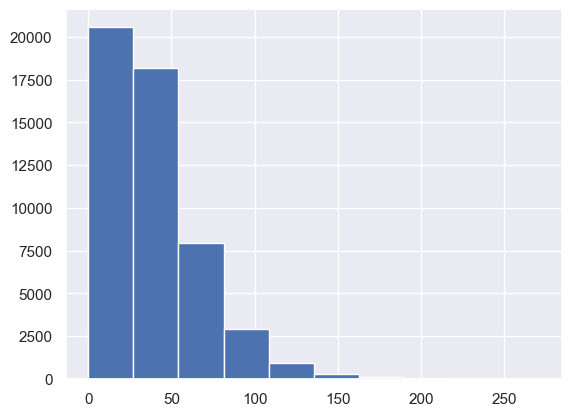

The distribution is skewed to the right
---------------------------------------
Statistics on: days_listed
count    50962.000000
mean        39.543405
std         28.198325
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
---------------------------------------
min border: 4.0
max border: 115.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 115.0
We have 1860 values that we can consider outliers


In [685]:
distribution_percentile_2('days_listed')

Let's take a closer look at lower and upper outliers. What is the difference between them?

In [686]:
subset.query('days_listed < 4')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
39,8000,2009.0,ford f-150,good,8.0,gas,234000,automatic,truck,black,1.0,2019-03-31,1,ford f-150,2,2019,3,6,10.1,23168.0
59,5200,2006.0,toyota highlander,good,6.0,gas,186000,automatic,SUV,green,0.0,2018-12-20,2,toyota highlander,2,2018,12,3,12.1,15372.0
75,6950,2005.0,chevrolet tahoe,excellent,8.0,gas,186021,automatic,SUV,unknown,1.0,2018-10-30,3,chevrolet tahoe,3,2018,10,1,13.1,14200.0
120,33900,2018.0,chevrolet silverado 1500 crew,good,8.0,gas,11315,other,pickup,white,1.0,2019-03-01,2,chevrolet silverado 1500,2,2019,3,4,1.1,10286.0
173,21100,2017.0,chevrolet camaro lt coupe 2d,good,6.0,gas,24510,other,coupe,red,0.0,2019-03-29,1,chevrolet camaro lt coupe 2d,2,2019,3,4,2.1,11671.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51202,22900,2016.0,ram 1500,excellent,8.0,gas,139900,automatic,truck,white,1.0,2019-03-28,2,ram 1500,3,2019,3,3,3.1,45129.0
51297,19500,2011.0,chevrolet silverado 1500,good,8.0,gas,81463,automatic,truck,grey,1.0,2018-05-17,1,chevrolet silverado 1500,2,2018,5,3,7.1,11474.0
51350,9999,2016.0,nissan altima,excellent,4.0,gas,87379,automatic,sedan,unknown,0.0,2018-07-28,3,nissan altima,3,2018,7,5,2.1,41609.0
51359,2999,2004.0,ford taurus,good,6.0,gas,136000,automatic,sedan,unknown,0.0,2018-10-22,0,ford taurus,2,2018,10,0,14.1,9645.0


In [687]:
subset.query('days_listed < 4').condition. value_counts()

excellent    373
good         289
like new      75
fair          17
new            3
Name: condition, dtype: int64

In [688]:
subset.query('days_listed < 4').model_flt. value_counts()

ford f-150                  48
chevrolet silverado 1500    43
ram 1500                    28
chevrolet silverado         24
ford f-250                  23
                            ..
acura tl                     1
chrysler 200                 1
toyota camry le              1
chevrolet cruze              1
chevrolet corvette           1
Name: model_flt, Length: 92, dtype: int64

In [689]:
subset.query('days_listed > 115')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage
34,9500,2008.0,toyota highlander,good,6.0,gas,149799,automatic,SUV,unknown,0.0,2018-06-04,121,toyota highlander,2,2018,6,0,10.1,14832.0
51,3800,2012.0,ford focus,good,4.0,gas,130323,automatic,sedan,black,0.0,2018-11-29,261,ford focus,2,2018,11,3,6.1,21364.0
89,18800,2015.0,chevrolet camaro lt coupe 2d,good,6.0,gas,33926,other,coupe,grey,0.0,2019-01-16,152,chevrolet camaro lt coupe 2d,2,2019,1,2,4.1,8275.0
104,22900,2014.0,ford f150 supercrew cab xlt,good,6.0,gas,73711,automatic,pickup,white,1.0,2019-02-27,141,ford f-150,2,2019,2,2,5.1,14453.0
193,6995,2009.0,ford ranger,good,4.0,gas,122447,automatic,pickup,white,0.0,2019-03-31,130,ford ranger,2,2019,3,6,10.1,12123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51321,3500,2005.0,toyota camry,excellent,4.0,gas,208299,automatic,sedan,green,0.0,2018-06-07,159,toyota camry,3,2018,6,3,13.1,15901.0
51335,2900,2006.0,chrysler town & country,excellent,6.0,gas,119000,automatic,mini-van,silver,0.0,2018-11-09,116,chrysler town & country,3,2018,11,4,12.1,9835.0
51368,2775,2007.0,ford focus,excellent,4.0,gas,111450,automatic,sedan,silver,0.0,2018-08-23,141,ford focus,3,2018,8,3,11.1,10041.0
51489,1200,2005.0,volkswagen jetta,fair,5.0,gas,185000,automatic,sedan,grey,0.0,2018-10-10,158,volkswagen jetta,1,2018,10,2,13.1,14122.0


In [690]:
subset.query('days_listed >115').condition. value_counts()

excellent    419
good         360
like new      69
fair          24
salvage        1
Name: condition, dtype: int64

In [691]:
subset.query('days_listed >115').model_flt. value_counts()

ford f-150                    53
chevrolet silverado 1500      41
ford f-250                    32
ram 1500                      31
chevrolet silverado           23
                              ..
acura tl                       3
nissan frontier                2
chrysler 200                   2
jeep grand cherokee laredo     1
nissan maxima                  1
Name: model_flt, Length: 90, dtype: int64

757 cars were sold too fast and ads were removed in less than 4 days, 874 cars were sold too slow, they were listed for an abnormally long time - 115 days and more. In both groups there are cars in good condition, of the same model year, and the first 4 more frequent models are the same.

What makes some cars to be sold quickly while the others can't find it's buyer? Obviously, it's related to car's price.

# Average price per each type of vehicle

There are 92 car models in the dataset.

In [692]:
subset.model_flt.unique()


array(['bmw x5', 'hyundai sonata', 'ford f-150', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'toyota rav4', 'chevrolet silverado',
       'jeep wrangler', 'chevrolet malibu', 'ford fusion se',
       'chevrolet impala', 'chevrolet corvette', 'jeep liberty',
       'toyota camry le', 'nissan altima', 'toyota highlander',
       'dodge charger', 'toyota tacoma', 'chevrolet equinox',
       'nissan rogue', 'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'chevrolet camaro lt coupe 2d', 'chevrolet cruze',
       'chevrolet silverado 3500hd', 'nissan frontier crew cab sv',
       'jeep grand cherokee laredo', 'chevrolet tahoe', 'nissan versa',
       'ford f-250', 'chevrolet camar

In [693]:
subset.model_flt.value_counts()

ford f-150                           3198
chevrolet silverado 1500             2199
ram 1500                             1577
ford f-250                           1408
chevrolet silverado                  1043
                                     ... 
chrysler 200                          221
nissan murano                         209
dodge dakota                          207
chevrolet silverado 3500hd            193
mercedes-benz benze sprinter 2500      34
Name: model_flt, Length: 92, dtype: int64

**The most popular models are ford f-150, chevrolet silverado 1500 and ram 1500.**

These 92 models can be categorised into smaller number of makes.

In [694]:
#Let's define function get_make:
def get_make(x):
    if 'ford' in x:
        return 'Ford'
    elif 'chevrolet' in x:
        return 'Chevrolet'
    elif 'jeep' in x:
        return 'Jeep'
    elif 'mercedes' in x:
        return 'Mercedes'
    elif 'chrysler' in x:
        return 'Chrysler'
    elif 'bmw' in x:
        return 'Bmw'
    elif 'hyundai' in x:
        return 'Hyundai'
    elif 'toyota' in x:
        return 'Toyota'
    elif 'honda' in x:
        return 'Honda'
    elif 'nissan' in x:
        return 'Nissan'
    elif 'kia' in x:
        return'Kia'
    elif 'dodge' in x:
        return 'Dodge'
    elif 'gmc' in x:
        return 'Gmc'
    elif 'ram' in x:
        return 'Ram'
    elif 'volkswagen' in x:
        return 'Volkswagen'
    elif 'buick' in x:
        return 'Buick'
    elif 'chrysler' in x:
        return 'Chrysler'
    elif 'cadillac' in x:
        return 'Cadillac'
    elif 'subaru' in x:
        return 'Subaru'
    elif 'acura' in x:
        return 'Acura'


Let's create one more column 'make' to store results of get_cat function applied to 'model' 
column of our subset.

In [695]:
subset['make']= subset['model'].apply(get_make)
subset.head()

C:\Users\vladimir\AppData\Local\Temp\ipykernel_8312\45586601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['make']= subset['model'].apply(get_make)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage,make
0,9400,2011.0,bmw x5,good,6.0,gas,145000,automatic,SUV,unknown,...,2018-06-23,19,bmw x5,2,2018,6,5,7.1,20423.0,Bmw
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,...,2019-02-07,79,hyundai sonata,4,2019,2,3,6.1,18033.0,Hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,168049,automatic,pickup,unknown,...,2019-03-22,9,ford f-150,1,2019,3,4,16.1,10438.0,Ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,...,2019-04-02,28,chrysler 200,3,2019,4,1,2.1,38525.0,Chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954,automatic,sedan,black,...,2018-06-20,15,chrysler 300,3,2018,6,2,4.1,14135.0,Chrysler


In [696]:
subset.make.value_counts()

Ford          11021
Chevrolet      8931
Toyota         4809
Honda          3120
Nissan         2864
Jeep           2808
Ram            2696
Gmc            2025
Subaru         1161
Hyundai        1090
Dodge          1053
Volkswagen      800
Chrysler        772
Kia             540
Cadillac        258
Buick           256
Bmw             245
Acura           222
Mercedes         34
Name: make, dtype: int64

**The most popular makes are Ford, Chevrolet and Toyota**

In [697]:
subset.type.value_counts()

sedan          10946
SUV            10880
truck          10373
pickup          6002
coupe           1839
wagon           1386
mini-van        1063
hatchback        917
van              566
convertible      319
other            216
offroad          175
bus               23
Name: type, dtype: int64

**The most popular types are sedan,SUV and truck**.

Let's compare price ratings  of different models, makes and types.

In [698]:
subset.groupby(['model_flt'])['price'].mean().sort_values(ascending=False)

model_flt
mercedes-benz benze sprinter 2500    34900.000000
ford mustang gt coupe 2d             25062.585106
ram 3500                             23620.583051
jeep wrangler unlimited              22417.812183
ford f-350 sd                        21591.794677
                                         ...     
jeep liberty                          5522.922840
nissan versa                          5303.012000
dodge dakota                          5144.628019
ford taurus                           5049.599278
chevrolet trailblazer                 4233.250000
Name: price, Length: 92, dtype: float64

In [699]:
subset.groupby(['make'])['price'].mean().sort_values(ascending=False)


make
Mercedes      34900.000000
Ram           17303.984421
Gmc           14787.554074
Chevrolet     13498.763856
Jeep          13144.683405
Cadillac      12825.461240
Ford          12384.215679
Buick         11507.535156
Bmw           10749.885714
Toyota        10305.768559
Nissan         9582.275838
Subaru         8833.108527
Kia            8695.564815
Dodge          8528.724596
Chrysler       8291.138601
Honda          7530.809936
Hyundai        7319.207339
Volkswagen     7314.008750
Acura          6485.909910
Name: price, dtype: float64

In [700]:
subset.groupby(['type'])['price'].mean().sort_values(ascending=False)

type
bus            17445.913043
truck          16027.796491
pickup         15628.246418
offroad        14946.211429
coupe          14207.112017
convertible    13157.128527
SUV            10945.305239
van            10628.395760
other          10606.675926
wagon           9108.519481
mini-van        8066.515522
sedan           7155.693039
hatchback       6992.827699
Name: price, dtype: float64

We may suppose that the more cars of a special model/make/type  on the market, the lower the price. Let's analyze the number of ads and the average price for each model.Check correlation between the mean price of the model/make/type and number of ads where it's proposed.

In [701]:
models=subset.groupby(['model_flt'])['price'].agg(['count','mean']).reset_index()
models

,model_flt,count,mean
0,acura tl,222,6485.909910
1,bmw x5,245,10749.885714
2,buick enclave,256,11507.535156
3,cadillac escalade,258,12825.461240
4,chevrolet camaro,305,13572.111475
...,...,...,...
87,toyota sienna,296,8802.922297
88,toyota tacoma,744,15700.193548
89,toyota tundra,505,15422.055446
90,volkswagen jetta,479,6522.720251


In [702]:
makes=subset.groupby(['make'])['price'].agg(['count','mean']).reset_index()
makes

,make,count,mean
0,Acura,222,6485.909910
1,Bmw,245,10749.885714
2,Buick,256,11507.535156
3,Cadillac,258,12825.461240
4,Chevrolet,8931,13498.763856
5,Chrysler,772,8291.138601
6,Dodge,1053,8528.724596
7,Ford,11021,12384.215679
8,Gmc,2025,14787.554074
9,Honda,3120,7530.809936


In [703]:
types=subset.groupby(['type'])['price'].agg(['count','mean']).reset_index()
types

,type,count,mean
0,SUV,10880,10945.305239
1,bus,23,17445.913043
2,convertible,319,13157.128527
3,coupe,1839,14207.112017
4,hatchback,917,6992.827699
5,mini-van,1063,8066.515522
6,offroad,175,14946.211429
7,other,216,10606.675926
8,pickup,6002,15628.246418
9,sedan,10946,7155.693039


Some groups are numerous, some are quite small. Correlation coefficient will show if there's dependancy between price and number of ads 
for model/make/type group.

In [704]:
models.corr()

,count,mean
count,1.000000,0.101511
mean,0.101511,1.000000


In [705]:
makes.corr()

,count,mean
count,1.000000,-0.000865
mean,-0.000865,1.000000


In [706]:
types.corr()

,count,mean
count,1.00000,-0.03181
mean,-0.03181,1.00000


**There's no correlation between price/make/type of a car and number of ads.** This fact is also reflected by the following graph. Rare cars may
have high price as well as low price, while most popular models  usually have middle prices.

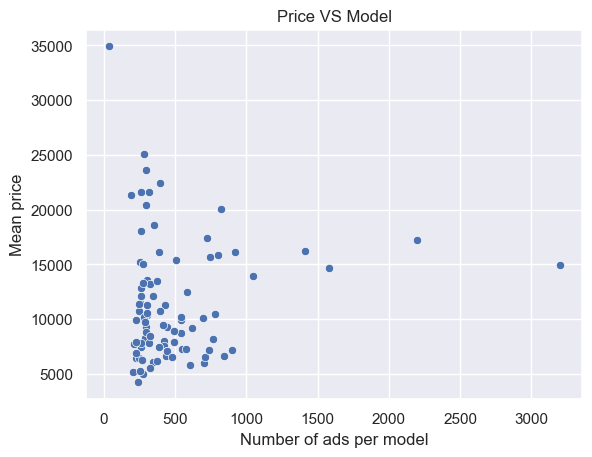

In [707]:
sns.scatterplot(data=models, x="count", y="mean")
plt.title('Price VS Model')
plt.xlabel('Number of ads per model')
plt.ylabel('Mean price')
plt.show()

The scatterplot shows the number of ads for each vehicle type.

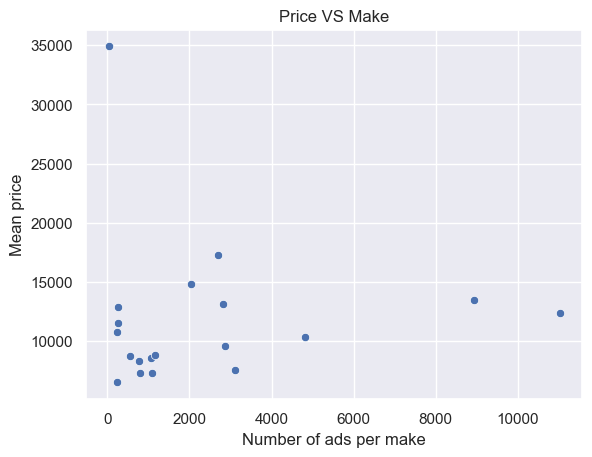

In [708]:
sns.scatterplot(data=makes, x="count", y="mean")
plt.title('Price VS Make')
plt.xlabel('Number of ads per make')
plt.ylabel('Mean price')
plt.show()

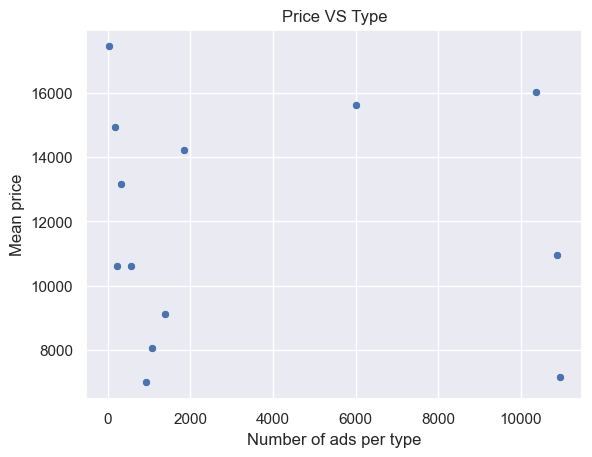

In [709]:
sns.scatterplot(data=types, x="count", y="mean")
plt.title('Price VS Type')
plt.xlabel('Number of ads per type')
plt.ylabel('Mean price')
plt.show()

In [710]:
subset.query('make == "Mercedes"')['type'].value_counts()

van    34
Name: type, dtype: int64

Mercedes is the most expensive and has the smallest number of ads, but it's a special case.Mercedes is the most expensive and has the smallest number of ads, but it's a special case. 
Other more or less numerous model, make, type groups may have nearly the same price.

**Conclusion. 
The most popular models are ford f-150, chevrolet silverado 1500 and ram 1500.
The most popular model types are Ford, Chevrolet, Toyota**
('ram 1500' was the 3rd in individual rating, but among makes Ram is only the 7th by popularity).
**The most popular types are sedan, SUV, truck.
No correlation between price and number of ads for model/make/type is found.**

## Price factors

To determine what factors impact the price most we take the two most popular types detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. 



### Sedan and SUV

First we create two subsets of our filtered data for Ford and Chevrolet vehical types.

In [711]:
Sedan=subset[subset['type']=='sedan']
Sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage,make
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,...,2019-02-07,79,hyundai sonata,4,2019,2,3,6.1,18033.0,Hyundai
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,...,2019-04-02,28,chrysler 200,3,2019,4,1,2.1,38525.0,Chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954,automatic,sedan,black,...,2018-06-20,15,chrysler 300,3,2018,6,2,4.1,14135.0,Chrysler
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212,automatic,sedan,white,...,2018-12-27,73,toyota camry,3,2018,12,3,3.1,25552.0,Toyota
11,8990,2012.0,honda accord,excellent,4.0,gas,111142,automatic,sedan,grey,...,2019-03-28,29,honda accord,3,2019,3,3,7.1,15654.0,Honda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136,automatic,sedan,black,...,2018-10-03,37,nissan maxima,4,2018,10,2,5.1,17282.0,Nissan
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500,automatic,sedan,white,...,2018-11-14,22,honda civic,1,2018,11,2,16.1,11273.0,Honda
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000,automatic,sedan,blue,...,2018-11-15,32,hyundai sonata,3,2018,11,3,9.1,14066.0,Hyundai
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573,automatic,sedan,black,...,2018-07-02,71,toyota corolla,2,2018,7,0,5.1,27367.0,Toyota


In [712]:
SUV=subset[subset['type']=='SUV']
SUV

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,model_flt,condition_rg,year_posted,month_posted,weekday_posted,car_age,avr_mileage,make
0,9400,2011.0,bmw x5,good,6.0,gas,145000,automatic,SUV,unknown,...,2018-06-23,19,bmw x5,2,2018,6,5,7.1,20423.0,Bmw
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473,automatic,SUV,black,...,2019-01-07,68,honda pilot,3,2019,1,0,6.1,17946.0,Honda
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174,automatic,SUV,unknown,...,2018-07-16,19,kia sorento,3,2018,7,0,6.1,17078.0,Kia
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191,automatic,SUV,blue,...,2019-02-15,17,honda pilot,3,2019,2,4,11.1,13260.0,Honda
14,12990,2009.0,gmc yukon,excellent,8.0,gas,132285,automatic,SUV,black,...,2019-01-31,24,gmc yukon,3,2019,1,3,10.1,13098.0,Gmc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012.0,chevrolet traverse,good,6.0,gas,144500,automatic,SUV,unknown,...,2019-03-05,1,chevrolet traverse,2,2019,3,1,7.1,20352.0,Chevrolet
51496,4999,2002.0,toyota 4runner,excellent,6.0,gas,177901,automatic,SUV,unknown,...,2018-05-26,59,toyota 4runner,3,2018,5,5,16.1,11050.0,Toyota
51500,6995,2012.0,buick enclave,excellent,6.0,gas,157000,automatic,SUV,white,...,2018-08-04,17,buick enclave,3,2018,8,5,6.1,25738.0,Buick
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088,automatic,SUV,unknown,...,2019-04-01,175,chevrolet equinox,4,2019,4,0,8.1,13715.0,Chevrolet


### Price VS car age, mileage

Then we extract only columns needed for scatterplot and correlation analysis(all quantitative variables).

In [713]:
for_scatter_Se=Sedan[['price','car_age','odometer']]
for_scatter_Se

,price,car_age,odometer
2,5500,6.1,110000
4,14900,2.1,80903
5,14990,4.1,57954
6,12990,3.1,79212
11,8990,7.1,111142
...,...,...,...
51520,9249,5.1,88136
51521,2700,16.1,181500
51522,3950,9.1,128000
51523,7455,5.1,139573


In [714]:
for_scatter_SUV=SUV[['price','car_age','odometer']]
for_scatter_SUV

,price,car_age,odometer
0,9400,7.1,145000
7,15990,6.1,109473
8,11500,6.1,104174
9,9200,11.1,147191
14,12990,10.1,132285
...,...,...,...
51495,9500,7.1,144500
51496,4999,16.1,177901
51500,6995,6.1,157000
51502,7995,8.1,111088


Relationship between each pair of parameters are shown on sns.pairplot and table of correlation

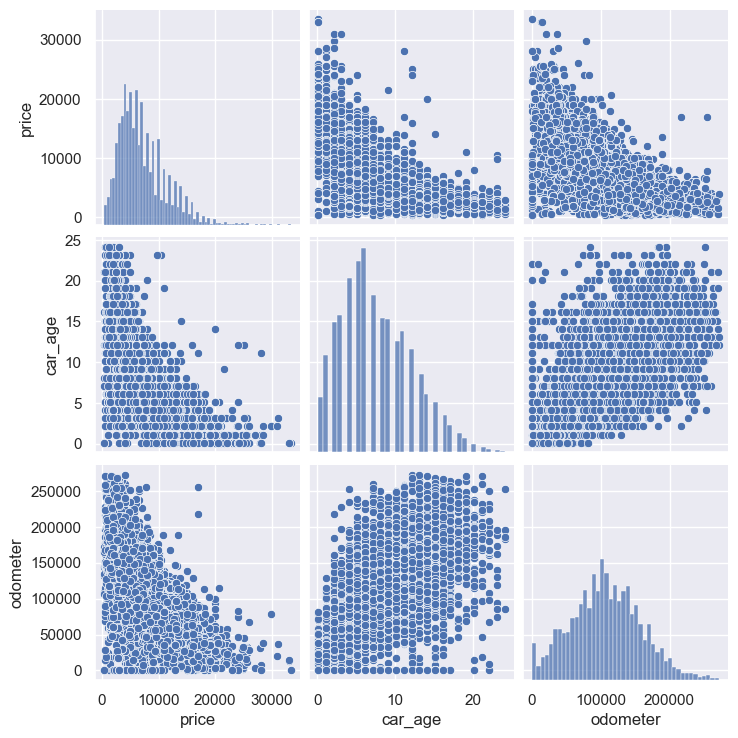

In [715]:
sns.pairplot(for_scatter_Se)

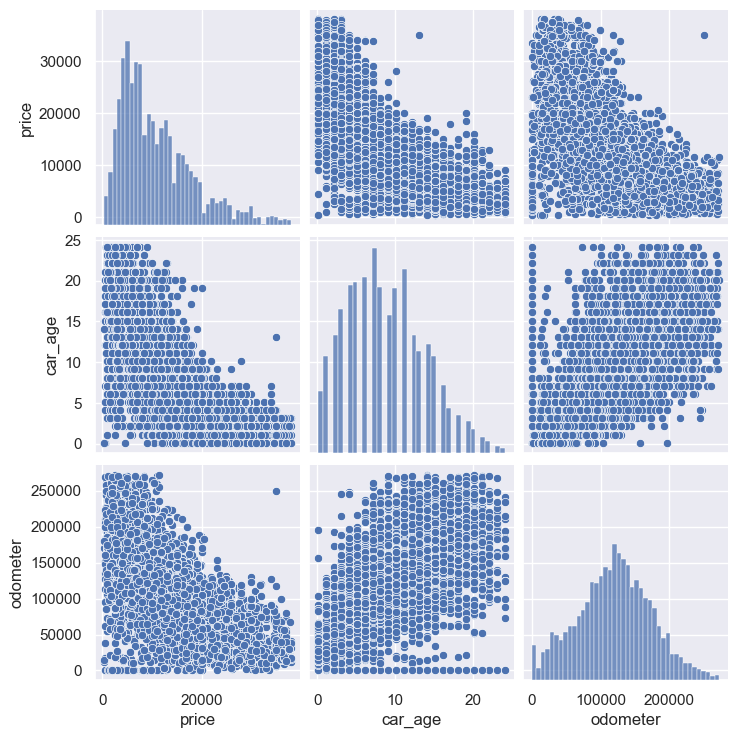

In [716]:
sns.pairplot(for_scatter_SUV)

The plots for Sedan and SUV are very similar. We see correlation in both type gtoups: the 
older the car and cars the higher odometer values, the lower the price.


What about correlation coefficient?

In [717]:
for_scatter_Se.corr()

,price,car_age,odometer
price,1.000000,-0.704024,-0.631652
car_age,-0.704024,1.000000,0.629817
odometer,-0.631652,0.629817,1.000000


In [718]:
for_scatter_SUV.corr()

,price,car_age,odometer
price,1.000000,-0.679819,-0.624592
car_age,-0.679819,1.000000,0.644532
odometer,-0.624592,0.644532,1.000000


**Conclusion.** In both groups there is a **negative correlation between price and car age(-0.7, -0,68) and 
between price and mileage (-0.63 Sedan, -0.62 SUV)**.

### price VS  color, transmission, condition

To analyse relationship between price and categorical parameters(condition, color, transmission) we take into account
that the categories must have at least 50 ads. Let's make clear what colors have more than 50 listings.

In [719]:
Sedan['paint_color'].value_counts()

unknown    1957
silver     1873
black      1616
grey       1482
white      1350
blue       1114
red         844
custom      244
brown       236
green       181
purple       23
yellow       18
orange        8
Name: paint_color, dtype: int64

In [720]:
SUV['paint_color'].value_counts()

unknown    1962
black      1910
white      1719
silver     1384
grey       1064
blue        914
red         818
green       385
brown       319
custom      255
orange       71
yellow       42
purple       37
Name: paint_color, dtype: int64

Number of purple, yellow, orange Sedans and yellow, purple SUVs is less than 50, 
so these groups are not statistically valid.

<AxesSubplot:xlabel='paint_color', ylabel='price'>

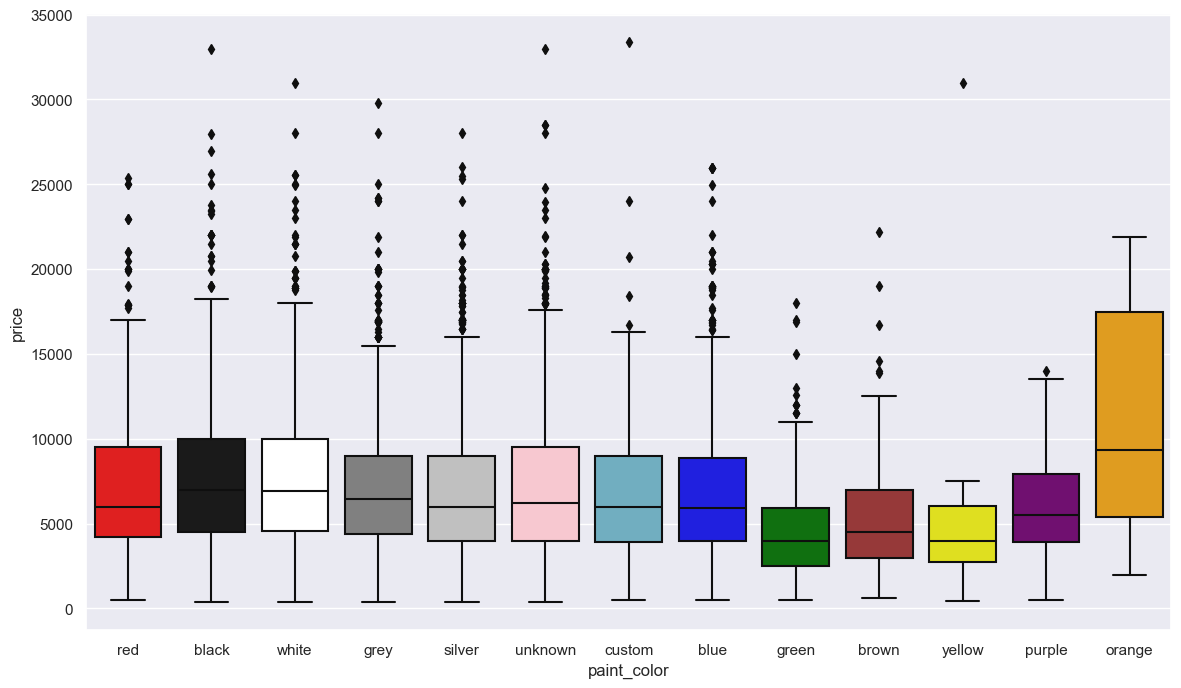

In [721]:
plt.figure(figsize=(14,8))
sns.set(style="darkgrid")
my_pal = {"red": "red", "black": "k", "white":"w", "grey": "grey", "blue":"blue", "brown": "brown",  "yellow":"yellow", 
          "silver": "silver", "unknown": "pink", "custom" : "c", "purple": "purple", "orange": "orange", "green":"green"}
sns.boxplot(x="paint_color", y="price", data=Sedan, palette=my_pal)

<AxesSubplot:xlabel='paint_color', ylabel='price'>

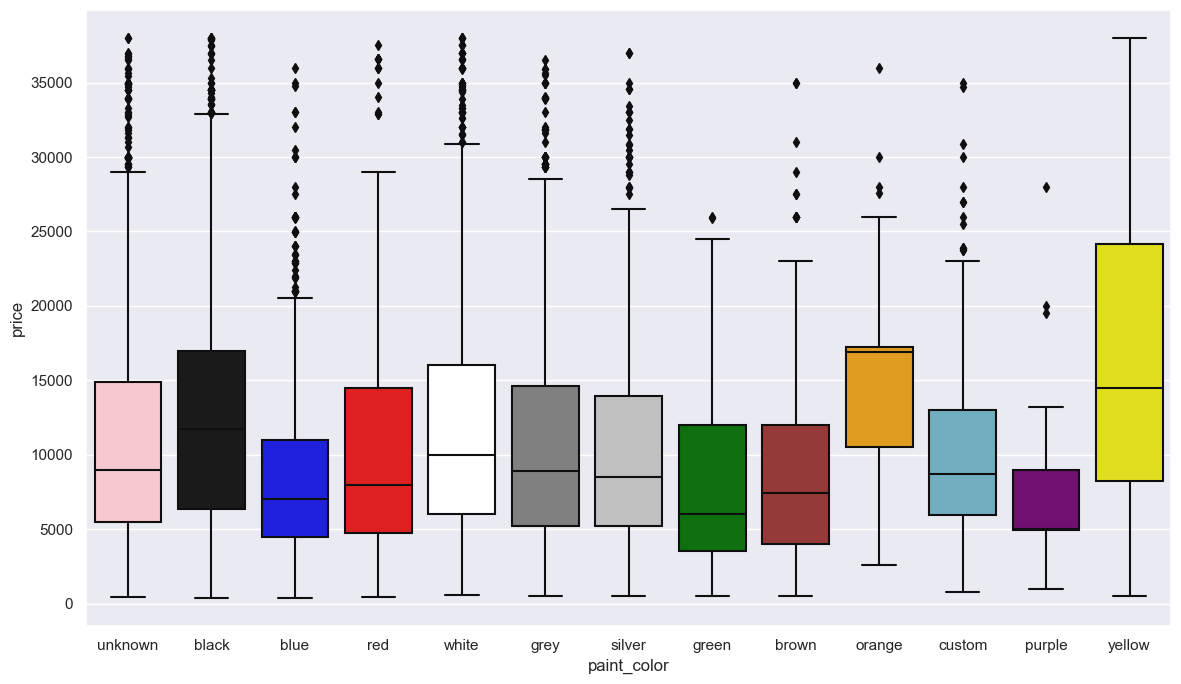

In [722]:
plt.figure(figsize=(14,8))
sns.set(style="darkgrid")
my_pal = {"red": "red", "black": "k", "white":"w", "grey": "grey", "blue":"blue", "brown": "brown",  "yellow":"yellow", 
          "silver": "silver", "unknown": "pink", "custom" : "c", "purple": "purple", "orange": "orange", "green":"green"}
sns.boxplot(x="paint_color", y="price", data=SUV, palette=my_pal)


Among big color groups the highest price is for black and white Sedans(almost equal), and black and white SUVs (difference is bigger),then come red and grey cars in both groups. Orange cars are really the most expensive, but their number is too small - only 8 Sedans and 71 SUVs. The latter is statistically valid, so we may say, that the most expensive SUV cars are orange, black and white. Here we draw conclusions looking at median values, IQR and whiskers.

It's also possible to group cars by color and see price destribution with describe method.

In [723]:
Sedan.groupby(['paint_color'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,1616.0,7700.782178,4249.769989,399.0,4495.00,6995.0,9999.00,32999.0
blue,1114.0,6759.026032,4159.007199,500.0,3950.00,5899.5,8878.50,25947.0
brown,236.0,5262.855932,3335.239875,600.0,2995.00,4498.0,6991.25,22199.0
custom,244.0,7104.463115,4552.259049,500.0,3900.00,5995.0,8996.00,33390.0
green,181.0,4817.806630,3285.988772,500.0,2500.00,3975.0,5900.00,17999.0
grey,1482.0,7152.383941,3932.933980,399.0,4400.00,6450.0,9000.00,29777.0
orange,8.0,11255.625000,7834.277976,1950.0,5396.25,9351.0,17473.50,21900.0
purple,23.0,6112.043478,3554.824768,500.0,3937.50,5495.0,7897.50,13991.0
red,844.0,7203.963270,4211.583489,500.0,4200.00,5995.0,9499.25,25390.0


In [724]:
SUV.groupby(['paint_color'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,1910.0,12814.202618,7984.293383,399.0,6362.5,11745.0,16995.0,37995.0
blue,914.0,8733.549234,5960.675364,372.0,4500.0,6995.0,10999.0,35995.0
brown,319.0,8704.949843,6046.650594,500.0,3995.0,7399.0,11995.0,34988.0
custom,255.0,10008.188235,6150.198962,800.0,5972.5,8700.0,12990.0,35000.0
green,385.0,8044.548052,5709.305276,475.0,3500.0,5999.0,11995.0,25950.0
grey,1064.0,10774.671992,7323.396357,500.0,5225.0,8900.0,14600.0,36500.0
orange,71.0,15304.845070,6842.047235,2599.0,10491.5,16900.0,17246.5,36000.0
purple,37.0,7138.432432,5489.694211,1000.0,4950.0,4999.0,8995.0,28000.0
red,818.0,10236.737164,7194.694088,450.0,4712.5,7995.0,14462.5,37499.0


**Conclusion**. We see almost the same results with mean values. Sedan: white(7734), black(7701), red(7204). SUV:orange(15304), black(12814), white(12016). The cheepest color is green for both groups.


There's one more parameter to analyse - transmission. Let's check it's values to make sure  
they have more than 50 cases.

In [725]:
Sedan['transmission'].value_counts()

automatic    10344
manual         531
other           71
Name: transmission, dtype: int64

In [726]:
SUV['transmission'].value_counts()

automatic    10364
manual         429
other           87
Name: transmission, dtype: int64

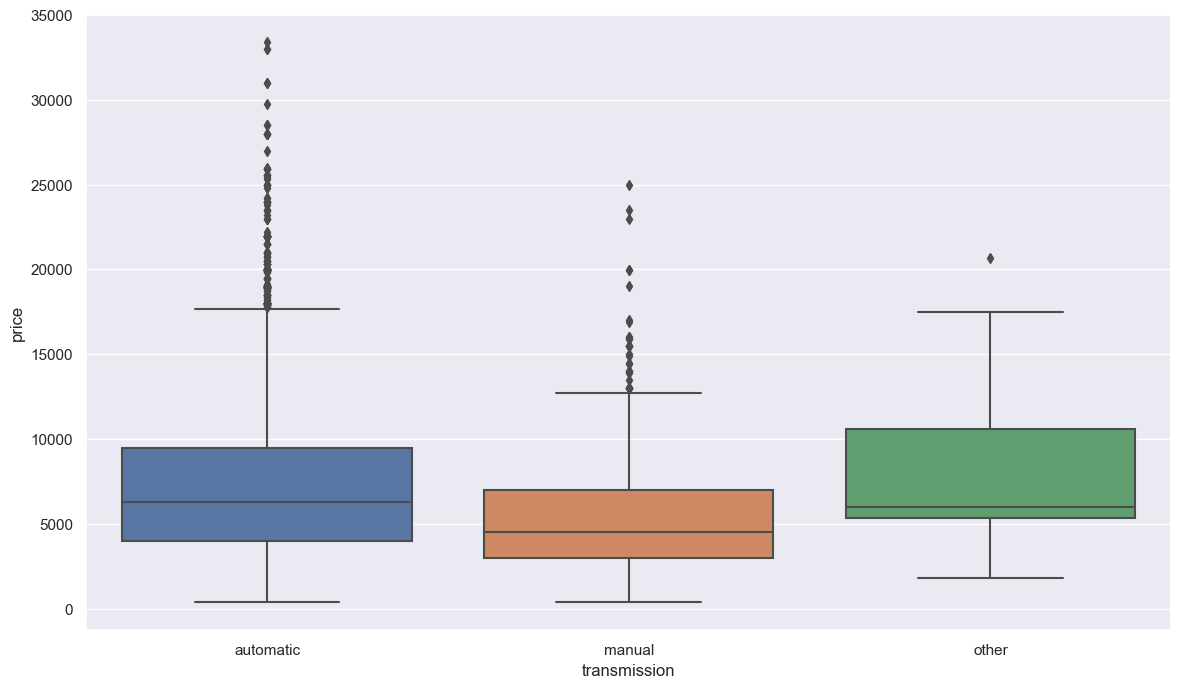

In [727]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=Sedan)

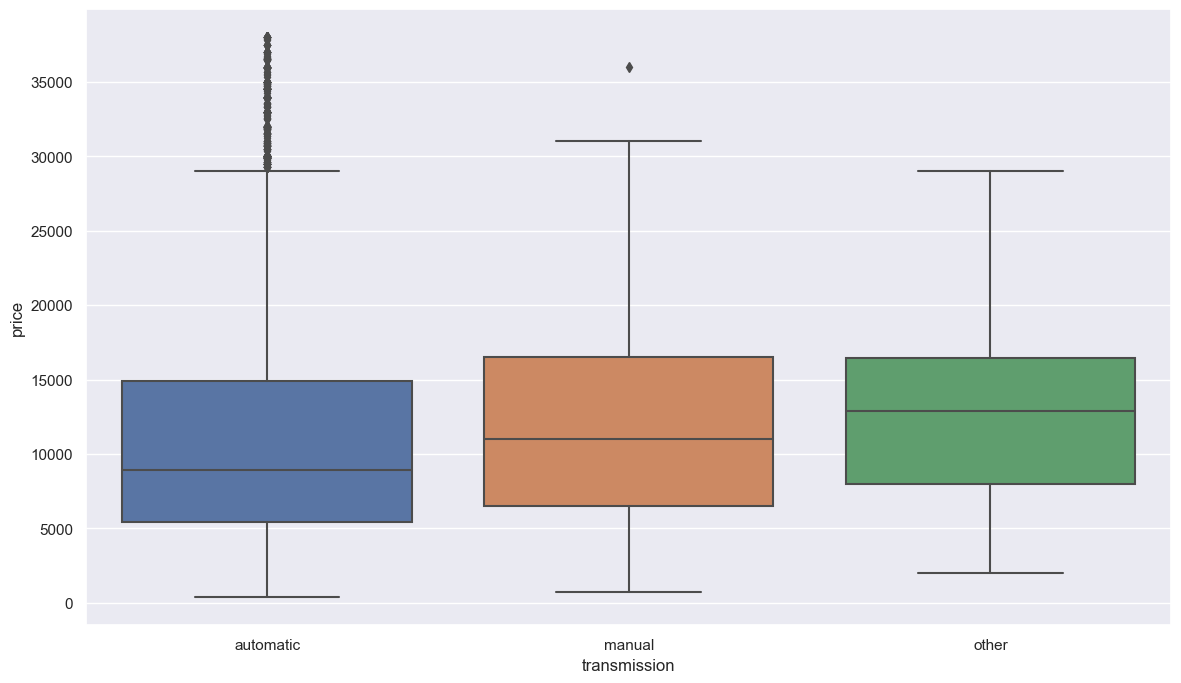

In [728]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=SUV)

In [729]:
Sedan.groupby(['transmission'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10344.0,7233.480955,4201.305401,384.0,4000.0,6299.0,9500.0,33390.0
manual,531.0,5565.713748,3790.457956,400.0,2999.0,4500.0,6992.5,25000.0
other,71.0,7714.014085,3885.824753,1800.0,5372.5,5995.0,10599.5,20700.0


In [730]:
SUV.groupby(['transmission'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10364.0,10898.592628,7401.024439,372.0,5400.0,8950.0,14900.0,37995.0
manual,429.0,11756.585082,6641.013571,700.0,6500.0,10995.0,16488.0,36000.0
other,87.0,12509.563218,5853.304028,2000.0,7995.0,12900.0,16465.0,28999.0


**Conclusion**. In both groups cars with 'other' transmission have the highest mean price, while the lowest mean price is typical for Sedan with manual transmission and SUV with automatic transmission. 'Other' transmission is relatively rare and has the mimimum price range, 'automatic' transmission is the most frequent and has maximum price range.
When we compare median prices,  they the highest for automatic transmission  in Sedan group and the lowest for automatic thansmission in SUV group.

**price and condition**

We assigned numbers to 'condition' parameter and now have 'condition_rg' column with numerical values, but actually it's a categotical parameter with only 5 values and shoul be analysed as other categorical parameters. 
Check'condition_rg' values in Sedan and SUV groups.

In [731]:
Sedan['condition_rg'].value_counts()

3    5492
2    3942
4    1190
1     285
5      37
Name: condition_rg, dtype: int64

In [732]:
SUV['condition_rg'].value_counts()

3    5686
2    3886
4    1014
1     281
5      13
Name: condition_rg, dtype: int64

Number of cars with 5(new) condition value is not enough to be statistically valid for both groups.
Check price-condition relationship with boxplots.

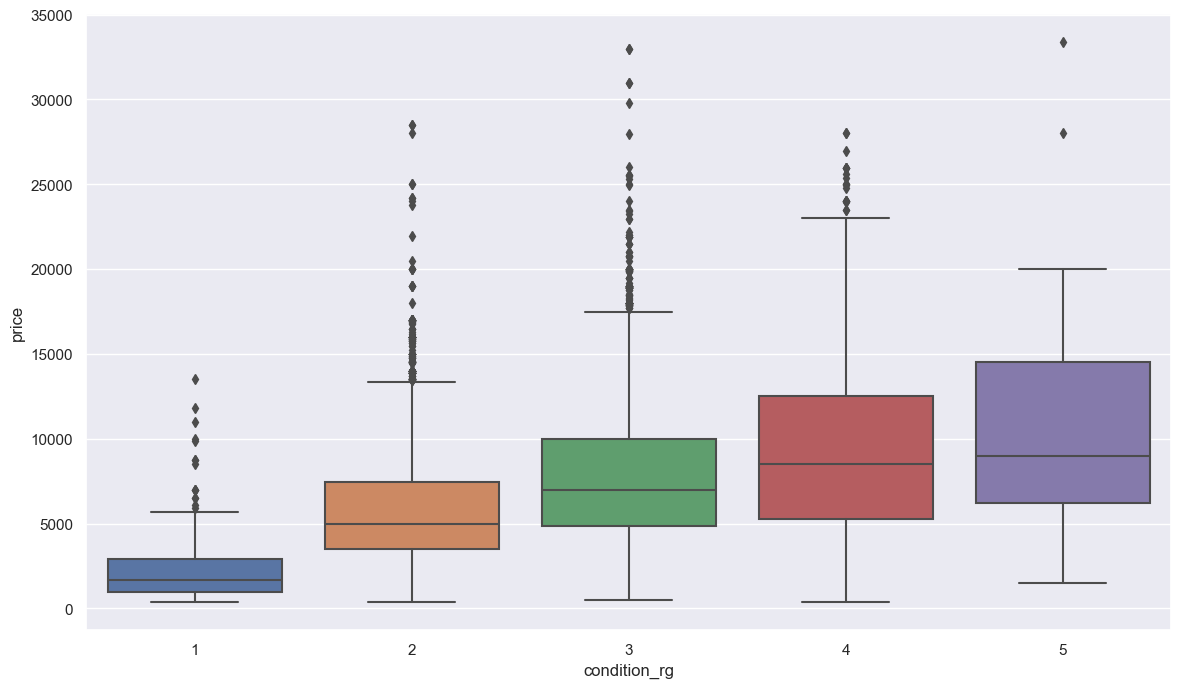

In [733]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x='condition_rg', y="price", data=Sedan)

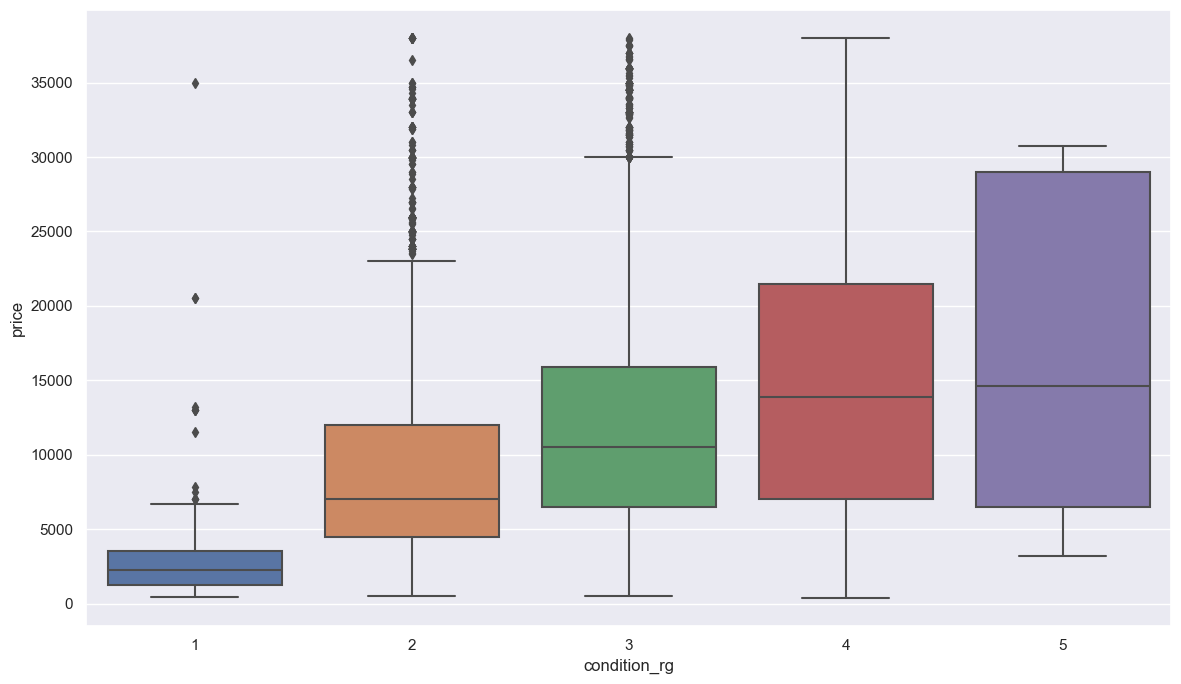

In [734]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="condition_rg", y="price", data=SUV)

These results could easily be predicted, there is a definite correlation. In both groups the better car's condition, the higher the price. Even though number of cars in exellent condition is too small to be statistically valid, they prove general tendency.

**Conclusion**. Price strongly depends on cars condition: the better car's condition, the higher the price.

# General conclusion


Exploration of the initial data revealed some issues with it:
- Five columns had missing data that were addressed:
  - values in 'is_4wd' column(boolean type) were restored,
  - 'paint_color' missing values were filled with 'unknown',
  - 'odometer' and 'cylinders' missing values(and weird values) were replaced with the median values for corresponding model_year and model groups, where possible, others were deleted(1% of data),
  - 'model_year' missing values were ignored.
- Some data types were also fixed. 


No duplicates were found. 
Some parameters were added: datetime values for when the ad was placed, vehicle's age when the ad was place, vehicle's average mileage per year.
Clean data of 50962 rows and 19 columns  was ready for the analysis.

Core parameters were studied: price, vehicle's age, mileage, number of cylinders, condition. Their distribution was examined, outliers defined and cut off. For the filtered subset(44705 rows - 87% of initial data) new histograms were plotted. 

How many days ads were displayed, or days_listed parameter was examined. Most often cars are sold in around 25 days. 50% of of cars are sold by the 33th day, the other half is spread up to 271 days. 757 cars were sold too fast(in less than 4 days), 874 cars were listed for an abnormally long time(115 days and more). Days_listed doesn't depend on car's condition, model, model year.


The most popular models are ford f-150, chevrolet silverado 1500 and ram 1500. The most popular makes are Ford, Chevrolet, Toyota.The most popular types are sedan, SUV, truck. It was proved that price doesn't depend on popularity of the car's model, make and type(no correlation found between the mean price for car model/make/type and number of ads with it). 

Price factors were examined on two subsets of data, Sedan and SUV:
- In both groups there is a negative correlation between price and car age(-0.7, -0,68). The older the car - the lower the price.
- In both groups there is a negative correlation between price and mileage(-0.63 Sedan, -0.62 SUV). The  greater the mileage - the lower the price.
- Color matters. The most expensive colors fo Sedan are white(7734), black(7701), red(7204), for SUV are orange(15304), black(12814), white(12016). The cheepest color is green for both groups.
- In both groups cars with 'other' transmission have the highest mean price and mimimum price range, 'other' transmission is relatively rare. 'Automatic' transmission is the most frequent and has maximum price range.
The lowest mean price is typical for Sedan with manual transmission and SUV with automatic transmission.  Median prices are the highest for automatic transmission in Sedan group and the lowest for automatic thansmission in SUV group.
- Price strongly depends on cars condition: the better car's condition, the higher the price.
